<a href="https://colab.research.google.com/github/RuthMeryC/Data-visualization/blob/main/Proyecto_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis de datos de las compañías automotrices en USA 2022 -2023

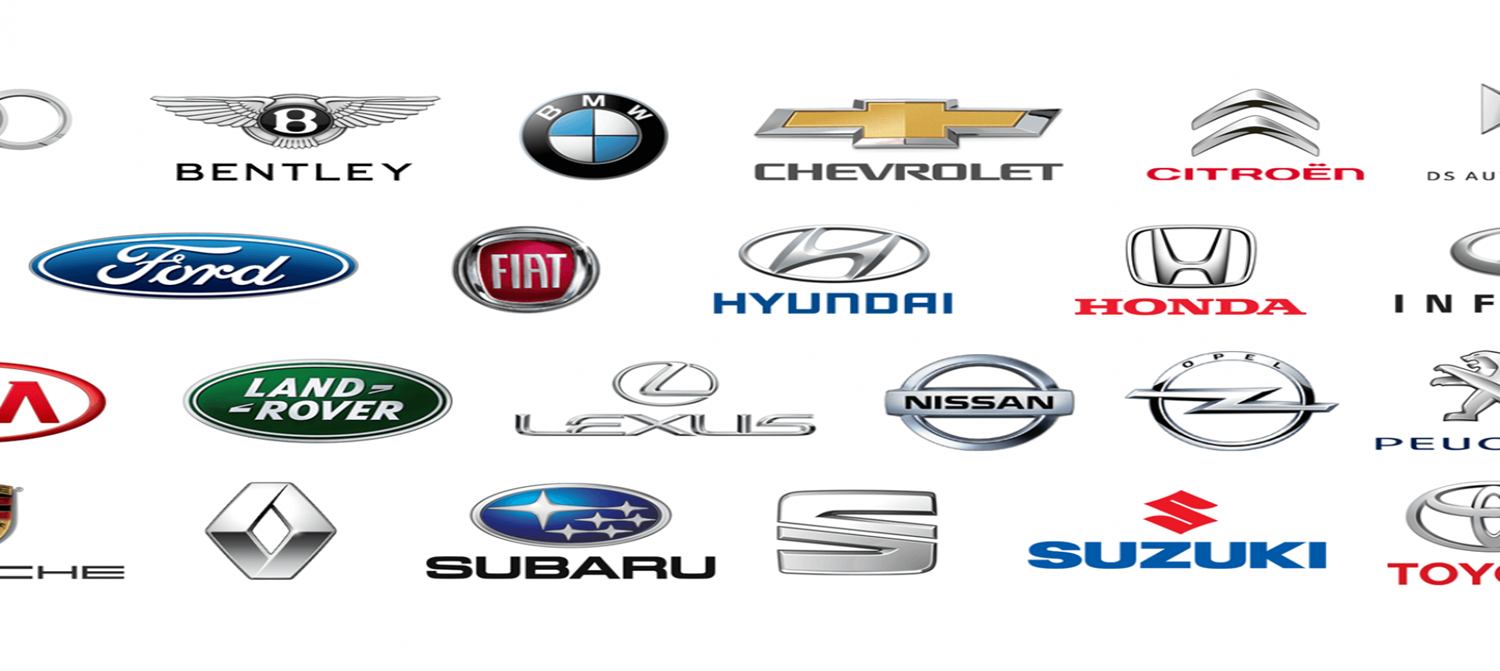

##Indice
1.	EDA

1.1 Descripción de los datos.

1.2 	Visualización de variables cualitativas.

1.3 Visualización de variables cuantitativas.

1.4 	Gráficos de tendencia y patrones estacionales.

1.5 Prueba de hipótesis y distribuciones

2.	PREPROCESAMIENTO

2.1 División de datos y escalamiento.

3.	MODELAMIENTO Y EVALUACION DE DATOS

3.1 Modelo LSTM

3.2 Resultado R^2, MAE, MSE

4.	CONCLUSIONES Y RECOMENDACIONES

##Introducción

Nuestra data comprende los registros de ventas de autos en 7 ciudades de los Estados Unidos del 2022 al 2023.
Se realizará un análisis de las ventas, tendencias, patrones estacionales y pruebas de hipótesis.
El resultado del análisis nos ayudará para la toma de decisiones en temas de Marketing, la optimización de inventarios, entre otros intereses en la industria automotriz.

#EDA

https://www.youtube.com/watch?v=uVm9VWvC3_A

https://www.kaggle.com/datasets/missionjee/car-sales-report

https://www.kaggle.com/code/ddosad/tourism-website-engagement-eda

https://www.kaggle.com/code/kshitijawadhiya/car-sales-eda-feature-exploration-and-ml

https://www.youtube.com/watch?v=3kXj6VgxbP8

In [ ]:
import sys


In [ ]:
!pip install pip


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

#print(sys.executable)

In [ ]:
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install keras


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install category_encoders


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

import plotly.express as px
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

##Descripción de los datos

In [ ]:
color1=['sandybrown', 'darkseagreen','gold','salmon','lightseagreen', 'orange', 'khaki','mediumaquamarine', 'slateblue','coral', 'steelblue','tomato', 'mediumaquamarine','lightgoldenrodyellow', 'lightcoral','slateblue', 'cornflowerblue','khaki', 'navajowhite','indianred', 'teal','mediumslateblue', 'goldenrod','cadetblue', 'orangered','y', 'darksalmon','lemonchiffon', 'mediumpurple','lightsteelblue', 'firebrick', 'plum', 'navajowhite']
fuente_label={'family': 'Bahnschrift SemiCondensed', 'color': 'black','size': 8}
fuente_title={'family': 'Bahnschrift SemiCondensed', 'color': 'black','size': 12}

In [ ]:
ruta_archivo = r'D:\Downloads\archive (27)\Car Sales.xlsx - car_data.csv'
df = pd.read_csv(ruta_archivo)
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df=df.rename(columns={'Customer Name': 'Customer_Name', 'Annual Income': 'Annual_Income'})
df['Customer_Name'].value_counts()

Customer_Name
Thomas           92
Emma             90
Lucas            88
Nathan           80
Louis            76
                 ..
Adelin            1
Zakarya           1
Paule             1
Noeline           1
Djamel Epoine     1
Name: count, Length: 3021, dtype: int64

Debido que se cuenta con dato nulo en la caracteristica 'Customer_Name', este se eliminará

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23905 non-null  object
 1   Date           23905 non-null  object
 2   Customer_Name  23905 non-null  object
 3   Gender         23905 non-null  object
 4   Annual_Income  23905 non-null  int64 
 5   Dealer_Name    23905 non-null  object
 6   Company        23905 non-null  object
 7   Model          23905 non-null  object
 8   Engine         23905 non-null  object
 9   Transmission   23905 non-null  object
 10  Color          23905 non-null  object
 11  Price ($)      23905 non-null  int64 
 12  Dealer_No      23905 non-null  object
 13  Body Style     23905 non-null  object
 14  Phone          23905 non-null  int64 
 15  Dealer_Region  23905 non-null  object
dtypes: int64(3), object(13)
memory usage: 3.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Car_id'].duplicated().sum()

0

Revisión de las variables categoricas

In [ ]:
colum_cat=df.select_dtypes(exclude=['int64'])
for colum in colum_cat:
    print(f"Categoria {colum}")
    print(sorted(df[colum].unique()))
    print(                                                         )

Categoria Car_id
['C_CND_000001', 'C_CND_000002', 'C_CND_000003', 'C_CND_000004', 'C_CND_000005', 'C_CND_000006', 'C_CND_000007', 'C_CND_000008', 'C_CND_000009', 'C_CND_000010', 'C_CND_000011', 'C_CND_000012', 'C_CND_000013', 'C_CND_000014', 'C_CND_000015', 'C_CND_000016', 'C_CND_000017', 'C_CND_000018', 'C_CND_000019', 'C_CND_000020', 'C_CND_000021', 'C_CND_000022', 'C_CND_000023', 'C_CND_000024', 'C_CND_000025', 'C_CND_000026', 'C_CND_000027', 'C_CND_000028', 'C_CND_000029', 'C_CND_000030', 'C_CND_000031', 'C_CND_000032', 'C_CND_000033', 'C_CND_000034', 'C_CND_000035', 'C_CND_000036', 'C_CND_000037', 'C_CND_000038', 'C_CND_000039', 'C_CND_000040', 'C_CND_000041', 'C_CND_000042', 'C_CND_000043', 'C_CND_000044', 'C_CND_000045', 'C_CND_000046', 'C_CND_000047', 'C_CND_000048', 'C_CND_000049', 'C_CND_000050', 'C_CND_000051', 'C_CND_000052', 'C_CND_000053', 'C_CND_000054', 'C_CND_000055', 'C_CND_000056', 'C_CND_000057', 'C_CND_000058', 'C_CND_000059', 'C_CND_000060', 'C_CND_000061', 'C_CND

Validamos que no tenemos datos anomalos en las variables categoricas.

La categoria 'Date' es de tipo objetc, por lo que se va a cambiar a categoria datetime

In [ ]:
df['Date']=df['Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer_Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual_Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

La categoria Engine cuenta con un dato anomalo 'DoubleÂ\xa0Overhead Camshaft'

In [ ]:
df_date=df[['Date', 'Price ($)']]
df_date.set_index('Date', inplace=True)
df_date

,Price ($)
Date,
2022-01-02,26000
2022-01-02,19000
2022-01-02,31500
2022-01-02,14000
2022-01-02,24500
...,...
2023-12-31,12000
2023-12-31,16000
2023-12-31,21000


In [ ]:
df['Engine'].replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft', inplace=True)
df['Engine'].value_counts()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11976\3364726285.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine'].replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft', inplace=True)


Engine
Double Overhead Camshaft    12570
Overhead Camshaft           11335
Name: count, dtype: int64

Revisión de las variables numéricas

Revisamos si existen valores negativos

In [ ]:
colum_num=df.select_dtypes(exclude=['object','datetime64[ns]']).drop(columns=['Phone'])
valor_neg=(colum_num<0).any()
print("Valor negativo:")
print(valor_neg[valor_neg].index)

Valor negativo:
Index([], dtype='object')


Análisis estadístico de las variables numéricas

In [ ]:
df.drop(columns='Date').describe().T

,count,mean,std,min,25%,50%,75%,max
Annual_Income,23905.0,8.308466e+05,720020.794597,10080.0,386000.0,735000.0,1176000.0,11200000.0
Price ($),23905.0,2.808954e+04,14788.592495,1200.0,18001.0,23000.0,34000.0,85800.0
Phone,23905.0,7.497753e+06,867508.047567,6000101.0,6746465.0,7496199.0,8248172.0,8999579.0


Análisis 'Annual_Income': Podemos observar que el ingreso mínimo anual es de $10,080.00 y máximo de $11,200,000.00, con una media de $830,846.00 y una mediana de $735,000.00.
La desviación estándar es de 720,021.00 lo que indica que los ingresos anuales están dispersos alrededor del promedio de ingresos anuales (existe una mayor variabilidad de los ingresos de las personas que adquirieron un auto).

Análisis 'Price ($)': Podemos observar que el precio mínimo de los automóviles es de $1,200.00 y máximo de $85,800.00, con una media de $28,090.00 y una mediana de $23,000.00.
La desviación estándar es de 14,788.00 lo que indica que los precios están dispersos alrededor de la media. En promedio los precios se desvían de la media $28,090.00 alrededor de $14,789.00


*Análisis* estadístico de las variables categóricas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer_Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual_Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

In [ ]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Car_id,23905,23905,C_CND_000001,1
Customer_Name,23905,3021,Thomas,92
Gender,23905,2,Male,18797
Dealer_Name,23905,28,Progressive Shippers Cooperative Association No,1318
Company,23905,30,Chevrolet,1819
Model,23905,154,Diamante,418
Engine,23905,2,Double Overhead Camshaft,12570
Transmission,23905,2,Auto,12570
Color,23905,3,Pale White,11255
Dealer_No,23905,7,85257-3102,3814


Se observa que el mayor número de compradores son hombres.
La compañía que tuvo mayor venta es Chevrolet.
El modelo más vendido es Diamante.
Austin es la región donde se compró más automóviles.

Visualización de los datos

Visualización de Gráficos - venta 2022 y 2023

In [ ]:
dfv1=df.copy()
dfv1['Year_Month']=dfv1['Date'].dt.strftime('%Y-%m')
gb1=dfv1.groupby('Year_Month')[['Price ($)']].sum().reset_index()
gb1

,Year_Month,Price ($)
0,2022-01,8931920
1,2022-02,8795365
2,2022-03,19502059
3,2022-04,22748867
4,2022-05,20608086
5,2022-06,19604211
6,2022-07,19935002
7,2022-08,23631362
8,2022-09,42218216
9,2022-10,23991509


findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.


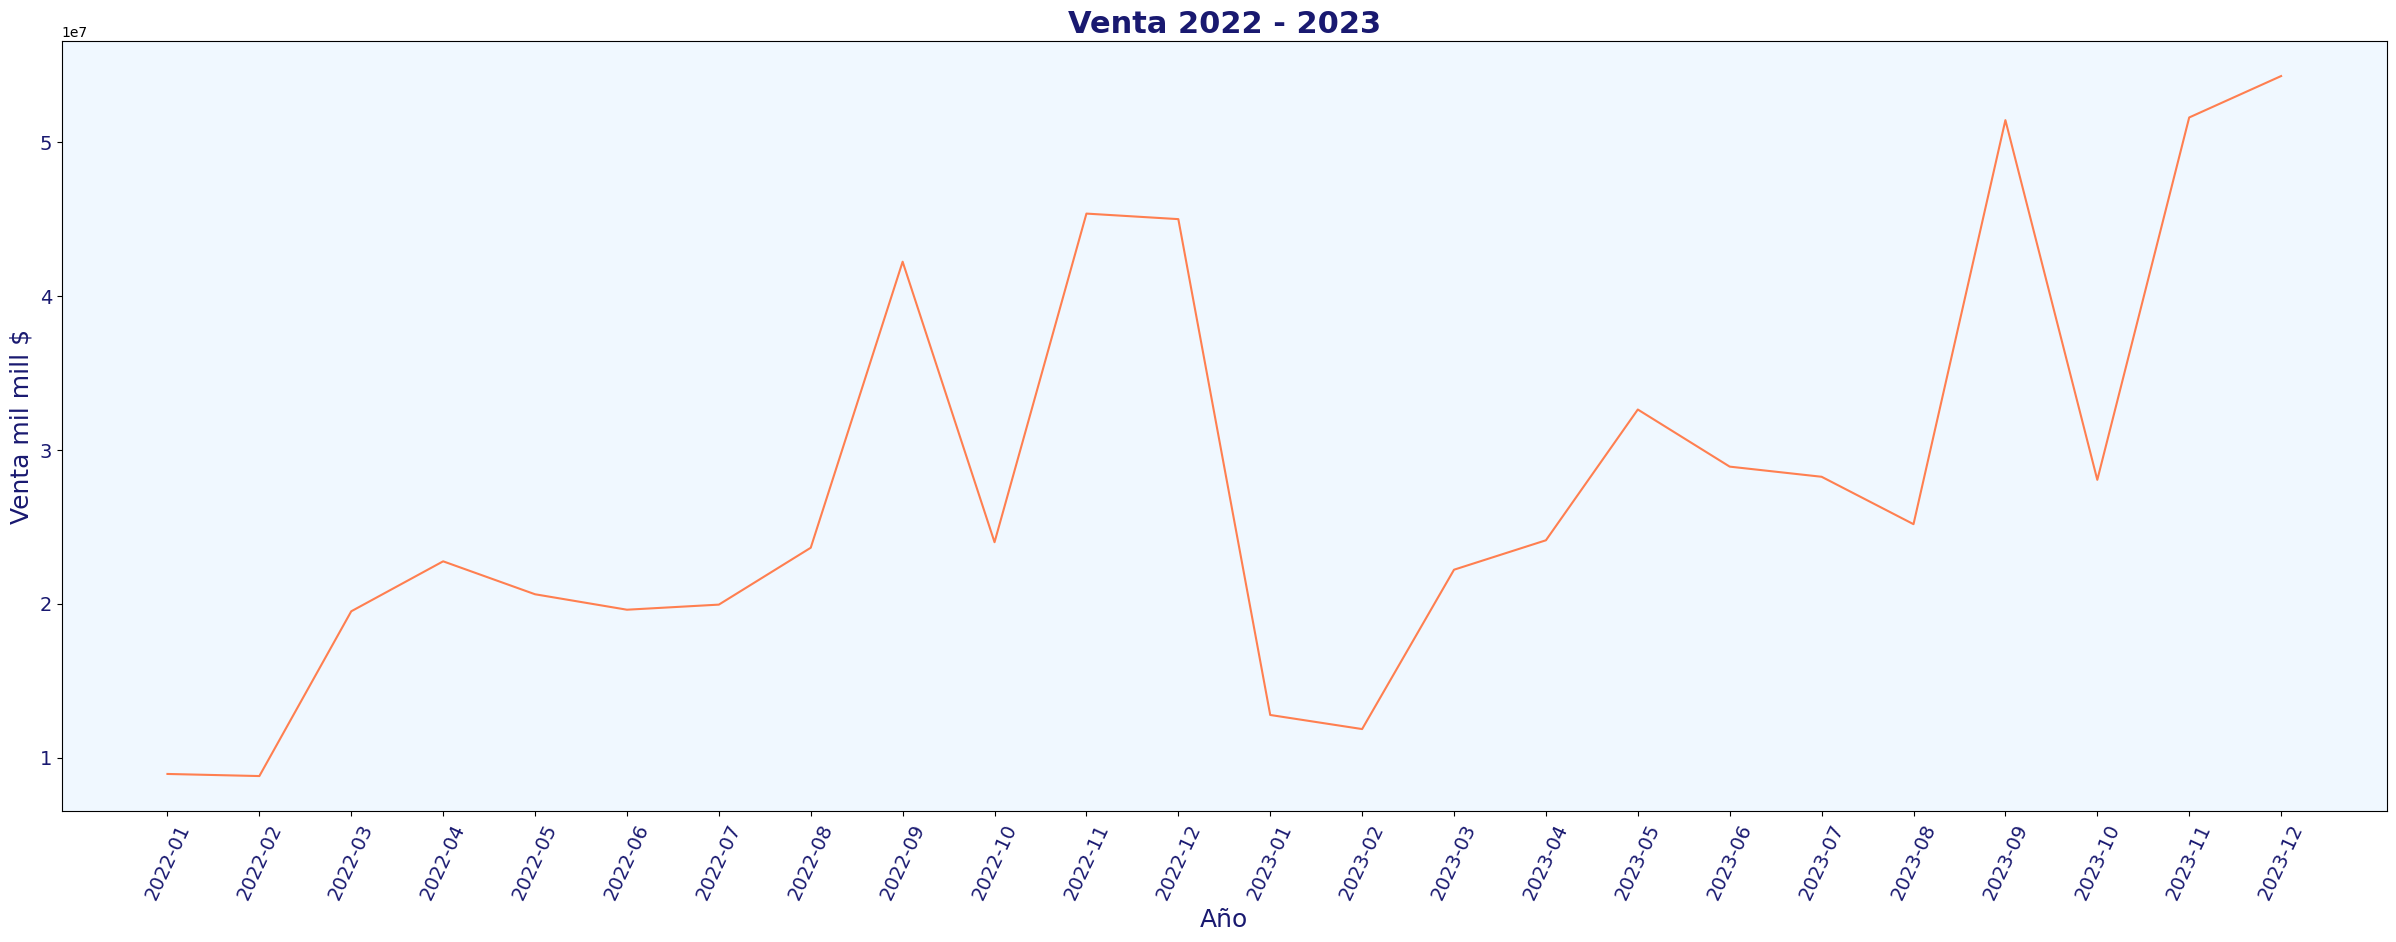

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(gb1['Year_Month'],gb1['Price ($)'], color="coral") #, marker='o', lw=2.5,  ms=6, markerfacecolor="orange"

#for val , value in enumerate(gb1['Price ($)']):
  #plt.text(gb1['Year_Month'][val],gb1['Price ($)'][val], f"{round(value,0)}", ha='right', va='bottom')

plt.ylabel("Venta mil mill $", fontdict=fuente_label, fontsize=18, color='midnightblue')
plt.xlabel("Año", fontdict=fuente_label, fontsize=18, color='midnightblue')
plt.xticks(fontsize=14, color='midnightblue', rotation=65)
plt.yticks(fontsize=14, color='midnightblue')
plt.title("Venta 2022 - 2023", color='midnightblue', fontsize=22, fontweight='bold')

plt.show()

En el gráfico se observa que el año 2022 en el mes de septiembre, noviembre y diciembre se tuvo una mayor demanda con respecto a los otros meses de este año. Sin embargo, a inicios del año 2023 las ventas cayeron, recuperándose a partir del mes de febrero, obteniendo una mayor demanda en el mes de septiembre, noviembre y diciembre.

In [ ]:
train4=df.groupby('Date')['Price ($)'].sum().reset_index()

In [ ]:
train4['year']=train4['Date'].dt.year
train4['month']=train4['Date'].dt.month_name()
years=train4['year'].unique()
years

array([2022, 2023])

In [ ]:
train4

,Date,Price ($),year,month
0,2022-01-02,882250,2022,January
1,2022-01-03,575503,2022,January
2,2022-01-04,393700,2022,January
3,2022-01-05,938103,2022,January
4,2022-01-06,303202,2022,January
...,...,...,...,...
607,2023-12-26,1870597,2023,December
608,2023-12-27,962103,2023,December
609,2023-12-29,4430666,2023,December
610,2023-12-30,1178503,2023,December


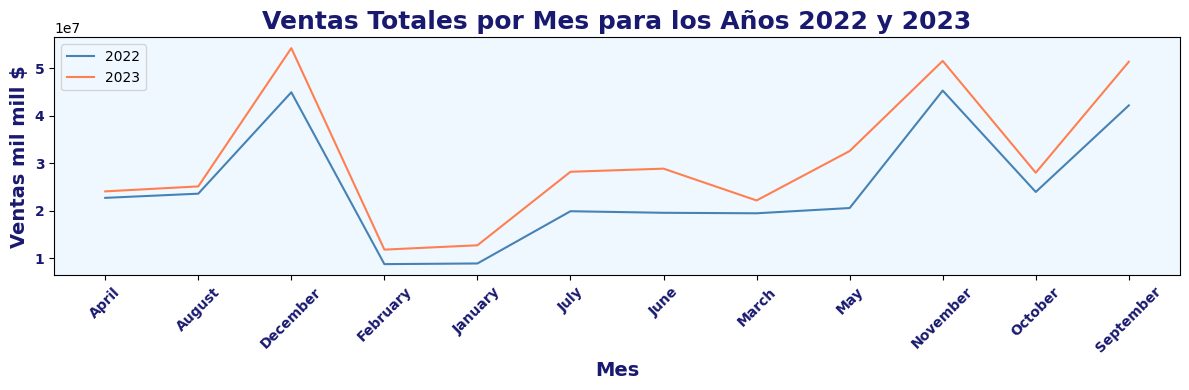

In [ ]:
# Agrupa los datos por año y mes
monthly_sales = train4.groupby(['year', 'month'])['Price ($)'].sum().unstack(level=0)

# Crear el gráfico
plt.figure(figsize=(12, 4))
plt.plot(monthly_sales.index, monthly_sales[2022], label='2022',  color='steelblue') #marker='o',
plt.plot(monthly_sales.index, monthly_sales[2023], label='2023', color='coral' )#marker='o'

plt.xlabel('Mes', color='midnightblue', fontsize=14, fontweight='bold' ) #
plt.ylabel('Ventas mil mill $', color='midnightblue', fontsize=14, fontweight='bold')#,
plt.title('Ventas Totales por Mes para los Años 2022 y 2023', color='midnightblue', fontsize=18, fontweight='bold')
plt.legend()

plt.grid(False)

plt.xticks(rotation=45, color='midnightblue',fontweight='bold')
plt.yticks(color='midnightblue',fontweight='bold')   # Rotar los nombres de los meses para mejor visualización
plt.tight_layout()
plt.show()

En el gráfico podemos observar que el año 2023 la venta fue mayor que el año 2022.

In [ ]:
train5=df.groupby('Date')[['Price ($)']].mean().reset_index()
train5

,Date,Price ($)
0,2022-01-02,25207.142857
1,2022-01-03,28775.150000
2,2022-01-04,26246.666667
3,2022-01-05,31270.100000
4,2022-01-06,30320.200000
...,...,...
607,2023-12-26,26722.814286
608,2023-12-27,27488.657143
609,2023-12-29,29342.158940
610,2023-12-30,29462.575000


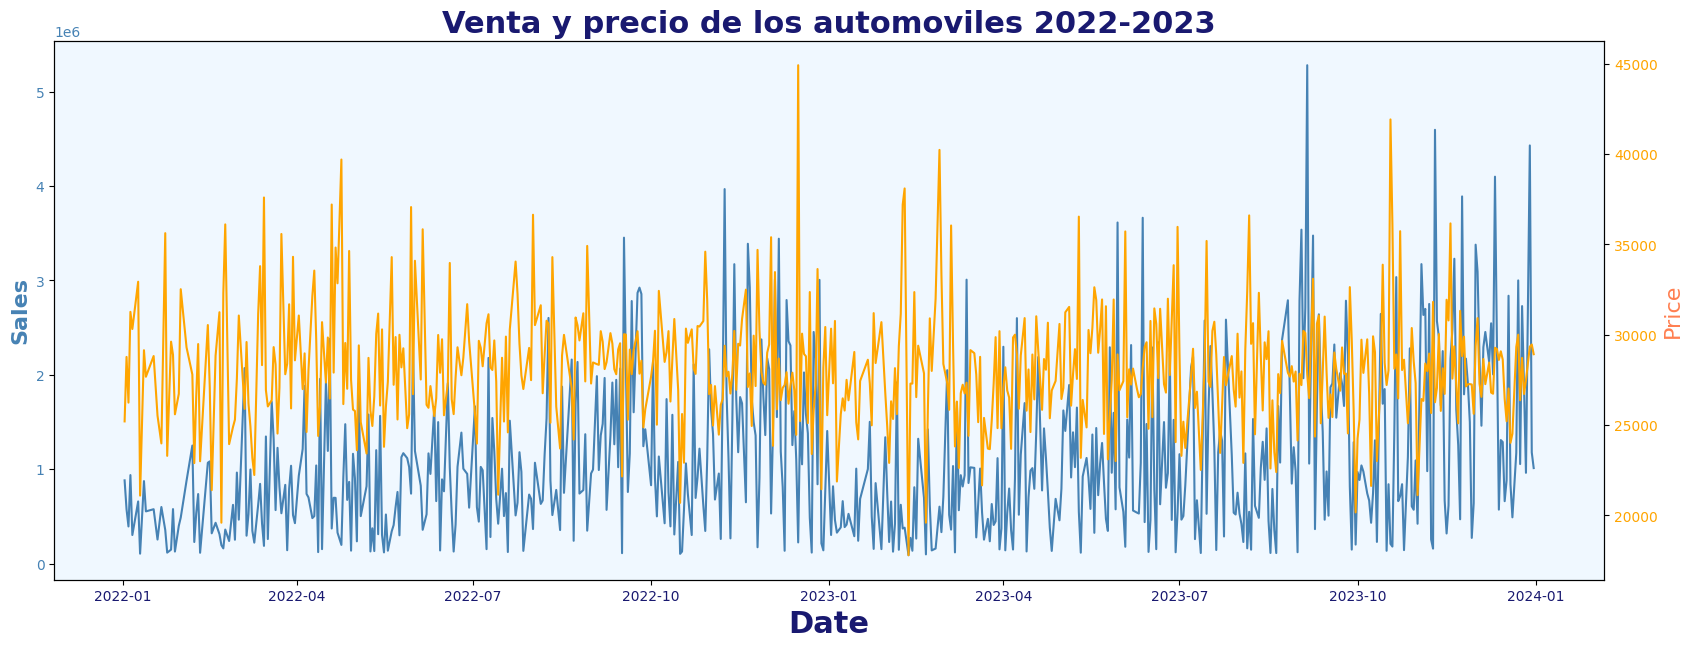

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,7))

#plot for sales 'slateblue','coral', color='midnightblue'
ax1.set_xlabel('Date', color='midnightblue', fontsize=22, fontweight='bold')
ax1.set_ylabel('Sales', color='steelblue', fontsize=16, fontweight='bold')
ax1.plot(train4['Date'], train4['Price ($)'], color='steelblue',
                      label='Sales')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.tick_params(axis='x', labelcolor='midnightblue')

#plot for oil price
ax2 = ax1.twinx()
ax2.set_ylabel('Price', color='coral', fontsize=16)
ax2.plot(train5['Date'], train5['Price ($)'], color='orange', label='Price')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.tick_params(axis='x', labelcolor='midnightblue')

plt.title('Venta y precio de los automoviles 2022-2023', color='midnightblue', fontsize=22, fontweight='bold')

plt.show()

En el gráfico, podemos observar que los precios de los automoviles no tienen una fuerte influencia en el nivel de ventas.

##Visualización de variables cualitativas

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11976\5508713.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_bar = sns.barplot(ax=axes[i, 0], x=df[colum].value_counts().index, y=df[colum].value_counts().values, palette='Spectral')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11976\5508713.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=65,color='midnightblue')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11976\5508713.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bar.set_yticklabels(ax_bar.get_yticklabels(), color='midnightblue')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11976\5508713.py:8: FutureWarn

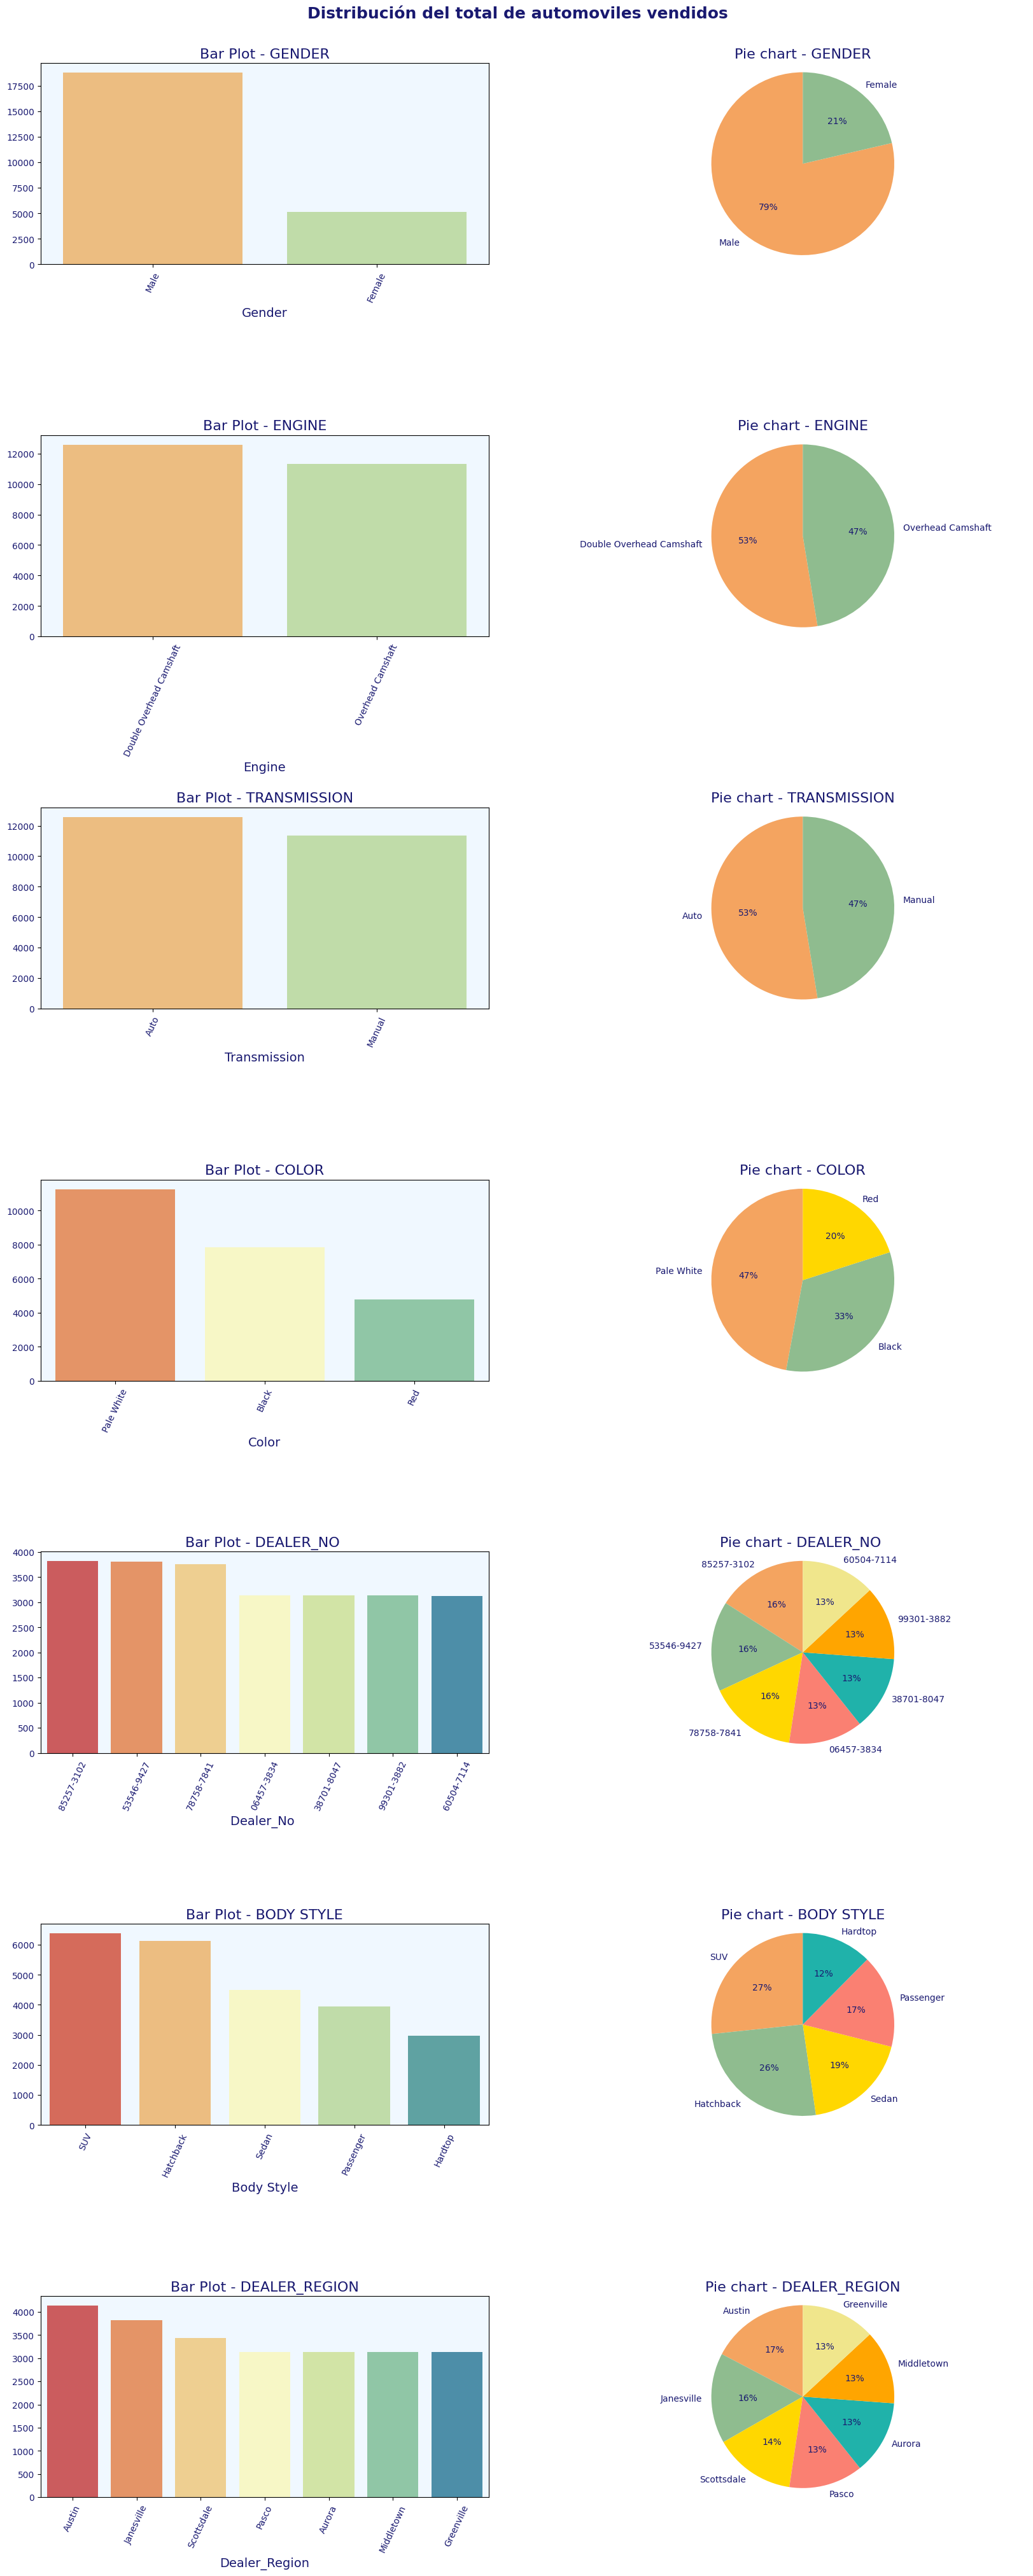

In [ ]:
df_cuanl=df.select_dtypes(include=['object']).columns.drop(['Car_id','Customer_Name','Dealer_Name','Model','Company'])
plt.rcParams['axes.facecolor']='aliceblue'
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 45), sharex=False)
fig.suptitle('Distribución del total de automoviles vendidos', color='midnightblue', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.96, hspace=0.85, wspace=0.2)

for i, colum in enumerate(df_cuanl):
    ax_bar = sns.barplot(ax=axes[i, 0], x=df[colum].value_counts().index, y=df[colum].value_counts().values, palette='Spectral')
    ax_bar.set_title(f'Bar Plot - {colum.upper()}', fontdict=fuente_title, fontsize=16, color='midnightblue')
    ax_bar.set_xlabel(colum, fontdict=fuente_label, fontsize=14, color='midnightblue')
    ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=65,color='midnightblue')
    ax_bar.set_yticklabels(ax_bar.get_yticklabels(), color='midnightblue')

    ax_pie=axes[i, 1]
    value_counts=df[colum].value_counts()
    ax_pie.pie(value_counts.values, labels=value_counts.index, autopct='%1.0f%%', textprops=dict(color="midnightblue"), startangle=90, colors=color1)
    ax_pie.set_title(f'Pie chart - {colum.upper()}', fontdict=fuente_title, fontsize=16, color="midnightblue")
    ax_pie.axis('equal')


1.En el gráfico se observa que del total de automoviles vendidos, el 79 % que los adquirieron fueron hombres y el 21% mujeres.

2.El color de automoviles más vendido es el 'palet white', con un 47%, seguido por el color 'black' con un 33% y por ultimo el color red con un 20%. Cabe mencionar que en el conjunto de datos solo se tiene 3 colores de automoviles.

3.En el tipo de cuerpo del automovil el más vendido es el de 'Suv' y 'Hatchback', con un 27% y 26% respectivamente.

4.Las regiones que mayor número de autos vendieron son Austin y Janesville con un 17% y 16% respectivamente, sin embargo, las otras regiones tienen una participación del 14% y 13%.

Seleccionamos las 15 compañias con mayor número de automoviles vendidos

In [ ]:
df1=df.copy()
df1['TOTAL_COUNT']=1
df1=df1.groupby('Company')[['TOTAL_COUNT']].count()
df4=df1.sort_values(by=['TOTAL_COUNT'], ascending=False)
top15=df4.head(15)

In [ ]:
other_sum = df4.iloc[15:].sum().values[0]
top15.loc['Others'] = other_sum

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11976\3544558378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15.loc['Others'] = other_sum


findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.


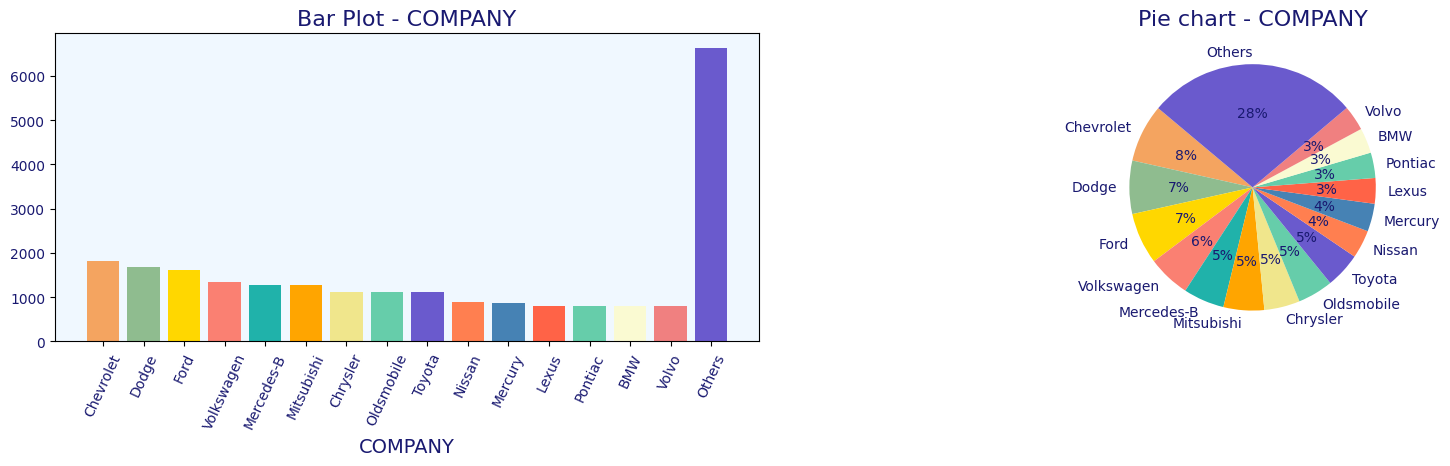

In [ ]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
plt.bar(top15.index, top15['TOTAL_COUNT'], color=color1)
plt.title('Bar Plot - COMPANY', fontdict=fuente_title, fontsize=16, color='midnightblue')
plt.xlabel('COMPANY', fontdict=fuente_label, fontsize=14, color='midnightblue')
plt.xticks(rotation=65,color='midnightblue')
plt.yticks(color='midnightblue')

plt.subplot(1,2,2)
plt.pie(top15['TOTAL_COUNT'].values, labels=top15.index, autopct='%1.0f%%', startangle=140, textprops=dict(color="midnightblue"), colors=color1) # startangle=90
plt.title('Pie chart - COMPANY', fontdict=fuente_title, fontsize=16, color="midnightblue")
plt.show()

In [ ]:
df['Company'].nunique()

30

Se cuenta con 30 compañías, de las cuales se seleccionaron las 15 compañías con mayor número de autos vendidos (50% del total de compañías); observándose en el gráfico que Chevrolet Dodge, Ford Volkswagen, Mercedes B, Mitsubishi, Chrysler, Oldsmobile, Toyota,  Nissan, Mercury, Lexus, Pontiac, BMW y Volvo representan el 72% de las ventas totales.

##Visualización de variables cuantitativas

In [ ]:
#import warnings
#warnings.filterwarnings("ignore")

Medidas de tendencia central:promedio, mediana y moda.

In [ ]:
BLUE, BOLD, RESET = '\033[94m', '\033[1m','\033[0m'

In [ ]:
print("Medidas de Tendencia Central para 'Ingreso anual' y 'Precio':\n")
print(f"Promedio de ingreso anual es: {BLUE}{BOLD}{df['Annual_Income'].mean()}{RESET}")
print(f"Mediana de ingreso anual es: {BLUE}{BOLD}{df['Annual_Income'].median()}{RESET}")
print(f"Moda de ingreso anual es: {BLUE}{BOLD}{df['Annual_Income'].mode()}{RESET}\n")

print(f"Promedio del precio: {BLUE}{BOLD}{df['Price ($)'].mean()}{RESET}")
print(f"Mediana del precio: {BLUE}{BOLD}{df['Price ($)'].median()}{RESET}")
print(f"Moda del precio: {BLUE}{BOLD}{df['Price ($)'].mode()}{RESET}")

Medidas de Tendencia Central para 'Ingreso anual' y 'Precio':

Promedio de ingreso anual es: 830846.5951056264
Mediana de ingreso anual es: 735000.0
Moda de ingreso anual es: 0    13500
Name: Annual_Income, dtype: int64

Promedio del precio: 28089.540472704455
Mediana del precio: 23000.0
Moda del precio: 0    22000
Name: Price ($), dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer_Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual_Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

Medidas de dispersión:varianza, desviación estandar y rango

In [ ]:
print("\nMedidas de Dispersión para 'Ingreso anual' y 'Precio:\n")
print(f"Varianza del ingreso anual: {BLUE}{BOLD}{df['Annual_Income'].var()}{RESET}")
print(f"Desviación Estándar del ingreso anual:{BLUE}{BOLD}{df['Annual_Income'].std()}{RESET}")
print(f"Rango del ingreso anual: {BLUE}{BOLD}{df['Annual_Income'].max() - df['Annual_Income'].min()}{RESET}\n")

print(f"Varianza del precio: {BLUE}{BOLD}{df['Price ($)'].var()}{RESET}")
print(f"Desviación Estándar del precio: {BLUE}{BOLD}{df['Price ($)'].std()}{RESET}")
print(f"Rango del precio: {BLUE}{BOLD}{df['Price ($)'].max() - df['Price ($)'].min()}{RESET}")


Medidas de Dispersión para 'Ingreso anual' y 'Precio:

Varianza del ingreso anual: 518429944651.5913
Desviación Estándar del ingreso anual:720020.79459665
Rango del ingreso anual: 11189920

Varianza del precio: 218702467.97377402
Desviación Estándar del precio: 14788.592494682312
Rango del precio: 84600


https://github.com/jeedorsa/Data-Analytics-CD/blob/main/5-Analisis%20Estadistico/5%20-Analisis%20Estadistico.ipynb

El dato más relevante en el análisis de las medidas de dispersión es que se tiene una varianza del ingreso anual muy alta, lo que los datos están muy dispersos alrededor de la media. Esto posiblemente se deba a que estamos comparando el ingreso anual de los clientes de diferentes regiones. Se hará el análisis de los ingresos por región líneas abajo.

findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'B

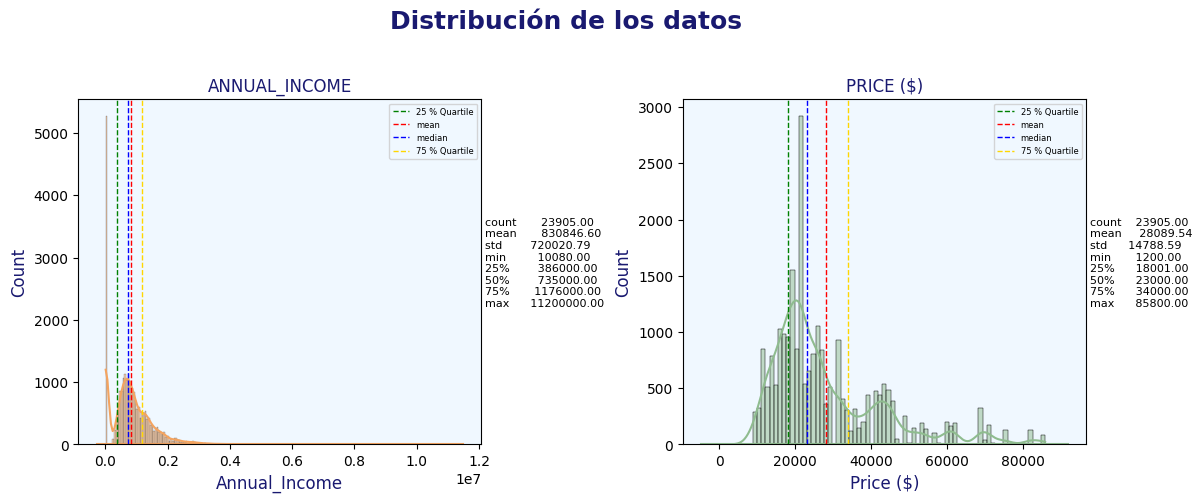

In [ ]:
df_cuant=df.select_dtypes(include=['int64']).columns.drop('Phone')
plt.rcParams['axes.facecolor']='aliceblue'
fig=plt.figure(figsize=(13,5))
fig.suptitle('Distribución de los datos', color='midnightblue', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.80)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, colum in enumerate(df_cuant):
    ax=fig.add_subplot(1,2,i+1)
    sns.histplot(df[colum], color=color1[i], kde=True, ax=ax)
    sns.kdeplot(df[colum], color=color1[i], ax=ax)
    ax.axvline(df[colum].quantile(q=0.25),color='green', linestyle='--', label='25 % Quartile', lw=1)
    ax.axvline(df[colum].mean(),color='red', linestyle='--', label='mean', lw=1)
    ax.axvline(df[colum].median(),color='blue', linestyle='--', label='median', lw=1)
    ax.axvline(df[colum].quantile(q=0.75),color='gold', linestyle='--', label='75 % Quartile', lw=1)
    datos_descriptivos=[line for line in str(df[colum].describe().round(2)).split('\n')if 'Name' not in line and 'dtype' not in line]
    datos_texto='\n'.join(datos_descriptivos)
    ax.annotate(datos_texto, xy=(1.01,0.4), xycoords='axes fraction', fontsize=8)
    ax.set_xlabel(f'{colum}', fontdict=fuente_label, color='midnightblue', fontsize=12)
    ax.set_ylabel('Count',fontsize=12, color='midnightblue')
    ax.set_title(f'{colum.upper()}', fontdict=fuente_title, color='midnightblue')
    ax.legend(fontsize=6)


En el histograma 'Annual Icome' se observa que el mayor número de personas cuenta con ingresos anuales alrededor de los $10,000.00. El ingreso mínimo es de $10,080.00.  y un ingreso anual máximo des $11'200,000.00.


En el histograma 'Price $' se observa que el precio promedio de los autos es de $28,090.00, también se observa que el mayor número de autos vendidos tiene una precio de $23,000.00.

Boxplot de las variables ingreso anual y precio

findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'B

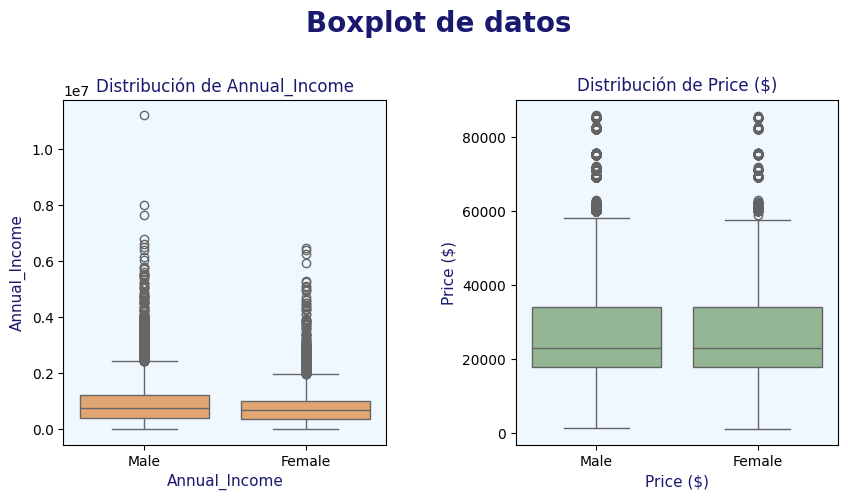

In [ ]:
plt.rcParams['axes.facecolor']='aliceblue'
fig=plt.figure(figsize=[10,5])
fig.suptitle('Boxplot de datos', color='midnightblue', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.80)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, colum in enumerate(df_cuant):
    ax1=fig.add_subplot(1,2,i+1)
    ax1=sns.boxplot(x='Gender', y=colum, data=df, color=color1[i])
    ax1.set_title(f'Distribución de {colum}', fontdict=fuente_title, color='midnightblue')
    ax1.set_xlabel(f'{colum}', fontdict=fuente_label, color='midnightblue', fontsize=11)
    ax1.set_ylabel(f'{colum}', fontdict=fuente_label, color='midnightblue', fontsize=11)

En el gráfico de boxplot 'Annual Icome' se observa que el que el ingreso anual de hombres es mayor al ingreso anual de las mujeres. Asimísmo, existen valores outlaires más altos en los ingresos de los hombres que en las mujeres.
Existe aproximadamente el mismo número de personas, con ingresos $735,000.00(mediana) para ambos sexos.

En el gráfico de boxplot 'Price' no se observa grandes diferencia en el precio de los automoviles que adquierieron entre los hombres y las mujeres. Sin embargo, en ambos casos existen valores outliers.
Existe menor número de personas que adquierieron un auto con el precio de $18,001.00 (Q1) a $23,000.00(mediana) y un precio mayor de $23,000.00 a $34,000.00(Q3) para ambos sexos.

Boxplot del ingreso anual y precios por región

findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'B

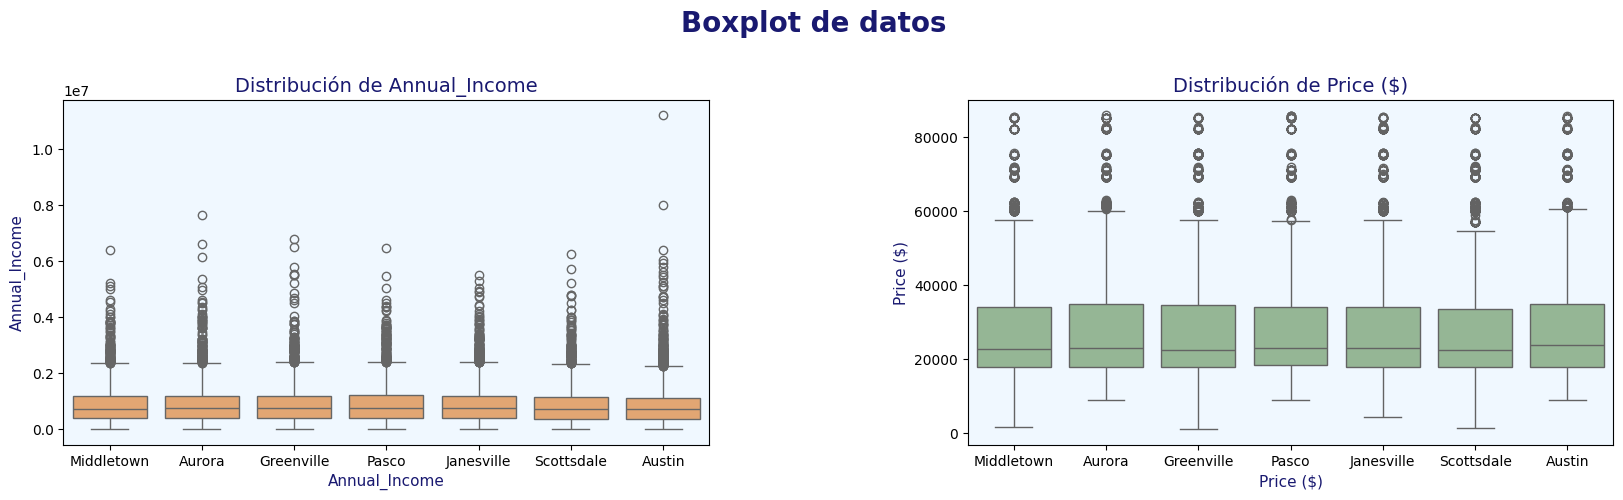

In [ ]:
plt.rcParams['axes.facecolor']='aliceblue'
fig=plt.figure(figsize=[20,5])
fig.suptitle('Boxplot de datos', color='midnightblue', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.80)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, colum in enumerate(df_cuant):
    ax1=fig.add_subplot(1,2,i+1)
    ax1=sns.boxplot(x='Dealer_Region', y=colum, data=df, color=color1[i])
    ax1.set_title(f'Distribución de {colum}', fontdict=fuente_title, color='midnightblue', fontsize=14)
    ax1.set_xlabel(f'{colum}', fontdict=fuente_label, color='midnightblue', fontsize=11)
    ax1.set_ylabel(f'{colum}', fontdict=fuente_label, color='midnightblue', fontsize=11)

En el gráfico de boxplot 'Annual Icome' por ciudades, se observa que los ingresos anuales por región son similares, asímismo, cada región cuenta con Ingresos anuales outliers, siendo Austin con los valores outliers más altos.

En el gráfico de boxplot 'Price $' por ciudades, se observa que los precios medios de los automoviles son similares en toda las regiones. Tambien se puede observar que en las regiones de Middlentown, Greenville y Scottsdale cuentan con autos con los precios más bajos. Asímismo, en cada region existen automoviles con precios excesivamente altos.

In [ ]:
estac=df[['Date', 'Price ($)']]
estac.set_index('Date', inplace=True)
estac.tail(5)

,Price ($)
Date,
2023-12-31,12000
2023-12-31,16000
2023-12-31,21000
2023-12-31,31000
2023-12-31,27500


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

##Graficos de tendencia y patrones estacionales

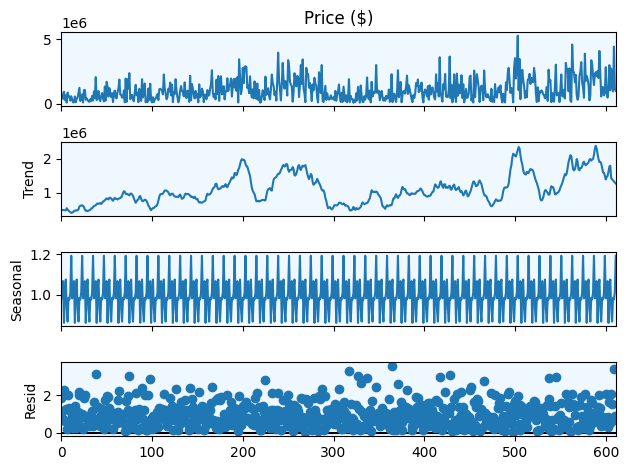

In [ ]:
# Descomponer la serie temporal
result_mul = seasonal_decompose(train4['Price ($)'], model='multiplicative', extrapolate_trend='freq', period=12)

result = seasonal_decompose(df['Price ($)'], model='additive', period=12)

# Graficar los componentes
result_mul.plot()
plt.show()

1. La serie original sugiere fluctuaciones significativas en el precio con varios picos y valles, posiblemente existen múltiples factores que influyen en los precios.
2. La tendencia de la serie temporal sugiere que a lo largo del tiempo hay un aumento general en los precios con ciertas fluctuaciones. Se observa periodos de crecimiento sostenido seguidos por caídas. Esta tendencia podría estar influenciada por cambios económicos, regulaciones del mercado o ciclos de oferta y demanda.
3. La estacionalidad muestra que los precios tienen un patrón estacional claro, con ciertas épocas del año donde los precios tienden a subir o bajar, esto podría deberse a temporadas de compra, fechas festivas.
4. Los residuales se distribuyen alrededor de cero, lo que indica que el modelo de descomposición ha capturado adecuadamente las tendencias y patrones estacionales. Sin embargo, la presencia de algunos puntos alejados de cero indica eventos atípicos que no se explican por la tendencia o estacionalidad.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_11976\3772678975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='Price ($)', data=train4, ax=axes[0], palette=color1) #palette='plasma'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11976\3772678975.py:4: UserWarning: The palette list has more values (31) than needed (2), which may not be intended.
  sns.boxplot(x='year', y='Price ($)', data=train4, ax=axes[0], palette=color1) #palette='plasma'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11976\3772678975.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='Price ($)', data=train4, ax=axes[1], palette=color1)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11976\377

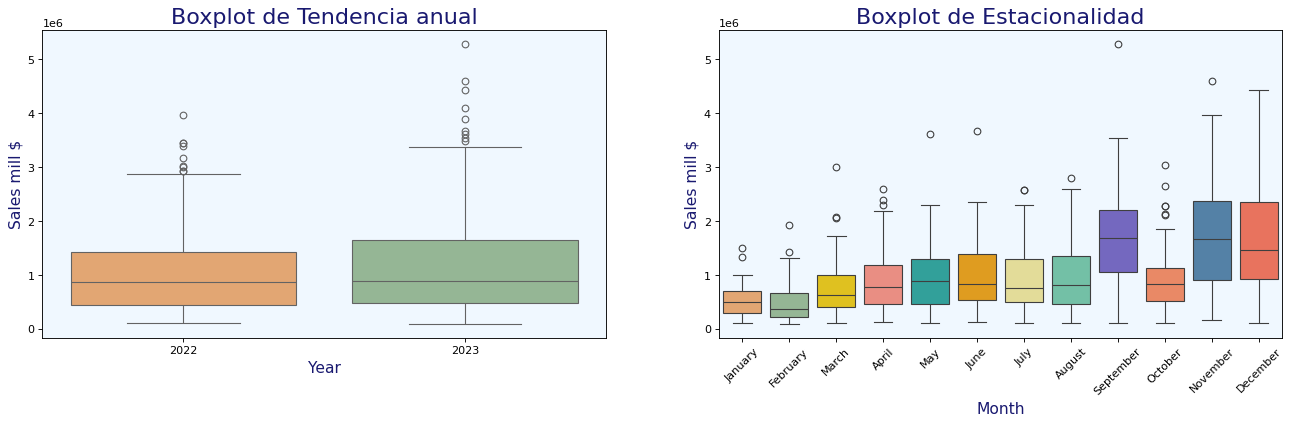

In [ ]:
#colors = ['peachpuff', 'orange', 'tomato', 'yellow', 'slateblue', 'lightcoral']

fig, axes = plt.subplots(1, 2, figsize=(20,5), dpi= 80)
sns.boxplot(x='year', y='Price ($)', data=train4, ax=axes[0], palette=color1) #palette='plasma'
sns.boxplot(x='month', y='Price ($)', data=train4, ax=axes[1], palette=color1)

#Set Title


axes[0].set_title('Boxplot de Tendencia anual', fontsize=20, color='midnightblue')# 'Boxplot\nTendencia anual'
axes[0].set_xlabel('Year', fontdict=fuente_label, color='midnightblue', fontsize=14)
axes[0].set_ylabel('Sales mill $', fontdict=fuente_label, color='midnightblue', fontsize=14)

axes[1].set_title('Boxplot de Estacionalidad', fontsize=20, color='midnightblue')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_xlabel('Month', fontdict=fuente_label, color='midnightblue', fontsize=14)
axes[1].set_ylabel('Sales mill $', fontdict=fuente_label, color='midnightblue', fontsize=14)

plt.show()

En el gráfico de tendencia anual, podemos observar que en el año 2023 la venta fue mayor en comparación del año 2022.


En el Gráfico de estacionalidad podemos observar que las ventas más altas fueron en el mes de septiembre, noviembre y diciembre. Posiblemente esto se deba a que existen fechas festivas como la navidad lo que impulso la venta.


https://www.youtube.com/watch?v=UxJ1VuIlTDc

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer_Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual_Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

Matriz de correlaciones

In [ ]:
colum_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Annual_Income  23905 non-null  int64
 1   Price ($)      23905 non-null  int64
dtypes: int64(2)
memory usage: 560.3 KB


findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.


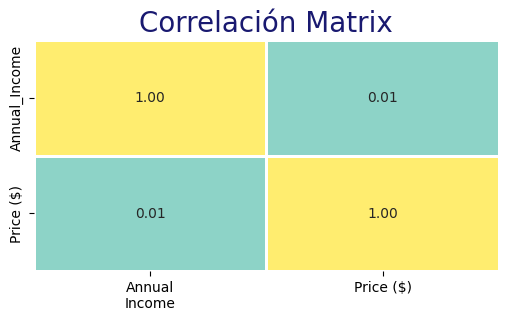

In [ ]:
correlacion = colum_num.corr(method='pearson')
fig=plt.subplots(figsize=(6,3))
ax=sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='Set3', cbar=None, linewidths=0.9)
ax.set_xticklabels([label.get_text().replace('_', '\n') for label in ax.get_xticklabels()], rotation=0, horizontalalignment='center')
ax.set_title('Correlación Matrix', fontdict=fuente_title, color='midnightblue', fontsize=20)
plt.show()

No existe correlación entre las variables ingreso anual de los clientes y el precio del auto que adquirieron.

##Prueba de hipótesis y distribuciones

Histograma diferenciado y agrupado

Text(0.5, 1.0, 'Distribución del precio segun género')

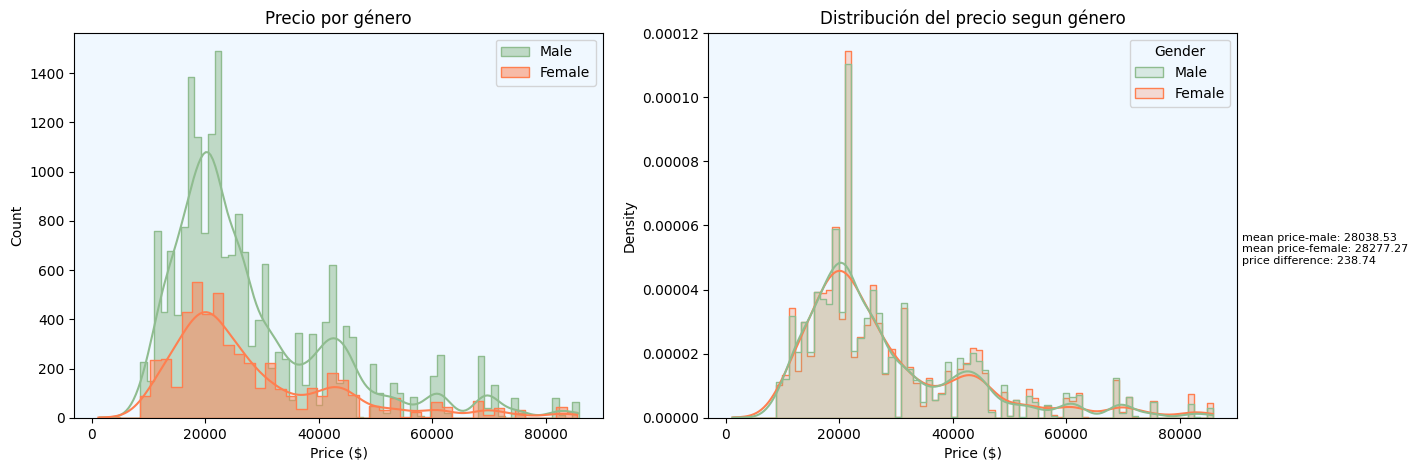

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

sns.histplot(df[df['Gender'] == 'Male']["Price ($)"], color='darkseagreen',kde=True, common_norm=False, element='step', label='Male' )
sns.histplot(df[df['Gender'] == 'Female']["Price ($)"], color='coral',kde=True, common_norm=False, element='step', label='Female')
plt.title('Precio por género')
plt.legend()

plt.subplot(1, 2, 2)

mean_price_genderm = df[df['Gender'] == 'Male']["Price ($)"].mean()
mean_price_genderf = df[df['Gender'] == 'Female']["Price ($)"].mean()

diff = mean_price_genderf-mean_price_genderm

sns.histplot(df, x='Price ($)', hue='Gender', element='step', stat='density', common_norm=False, kde=True, palette={'Male': 'darkseagreen', 'Female': 'coral'})
plt.annotate(f'mean price-male: {mean_price_genderm:.2f}\nmean price-female: {mean_price_genderf:.2f}\nprice difference: {diff:.2f}', xy=(1.01,0.4), xycoords='axes fraction', fontsize=8, color='black')
plt.title('Distribución del precio segun género')

En el grafico de precio por género se observa que, tanto hombres como mujeres han adquirido automoviles con precios similares, sin embargo el numero de compradores hombres es mayor al numero de compradores mujeres. El precio alrededor de los $20,000.00 tiene mayor número de compradores hombres, superando una frecuencia de 1400.


En el gráfico de la distribución del precio segun el género podemos observar que el precio de automoviles comprados, tiene un comportamiento similar en ambos generos (male, female).

H0=     no existen asociación  entre el género y el precio de automoviles que adquirieron.

Valor de significancia=0.05

se realiza un análisis para saber si los datos tienen una distribución normal, para ello primero hacemos la prueba de Shapiro-Wilk.

In [ ]:
from scipy.stats import shapiro

In [ ]:
grupo1 = df[df['Gender'] == 'Male']['Price ($)']
grupo2 = df[df['Gender'] == 'Female']['Price ($)']

stat_grupo1, p_valor_grupo1=shapiro(grupo1)
print(f'El grupo1 - estadistico w: {stat_grupo1}, valor p: {p_valor_grupo1}')

stat_grupo2, p_valor_grupo2=shapiro(grupo2)
print(f'El grupo2 - estadistico w: {stat_grupo2}, valor p: {p_valor_grupo2}')

El grupo1 - estadistico w: 0.8626948262201803, valor p: 1.6860319688199002e-82
El grupo2 - estadistico w: 0.8526785747125583, valor p: 2.2857114571027146e-56


c:\INTRODUCCION_PYTHON\miproj\my_venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18797.
  res = hypotest_fun_out(*samples, **kwds)
c:\INTRODUCCION_PYTHON\miproj\my_venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5108.
  res = hypotest_fun_out(*samples, **kwds)


El valor p es menor que 0.05, por lo tanto rechazamos la H0 de que los datos tienen una distribucion normal. Ya que los datos no vienen de una distribucion normal.

Para la prueba de hipótesis, se utilizará la Prueba de chi-cuadrado

In [ ]:
from scipy.stats import chi2_contingency

Crear una tabla de contingencia

In [ ]:
tabla_contingencia = pd.crosstab(df['Gender'], df['Price ($)'])

Prueba de hipotes chi-cuadrado

https://www.ibm.com/docs/es/spss-statistics/saas?topic=test-chi-square-options

In [ ]:
chi2, p_val, grados_libertad, _ = chi2_contingency(tabla_contingencia)
print(f"Estadístico chi2: {chi2}, Valor p: {p_val}, Grados de libertad: {grados_libertad}")

Estadístico chi2: 833.9836045914184, Valor p: 0.798266326049301, Grados de libertad: 869


El p-valor en mayor que 0.05, por lo tanto podemos concluir que no hay una asociación significativa entre el género y el precio de autos que adquirieron.

Text(0.5, 1.0, 'Distribución del precio por tipo de transmisión')

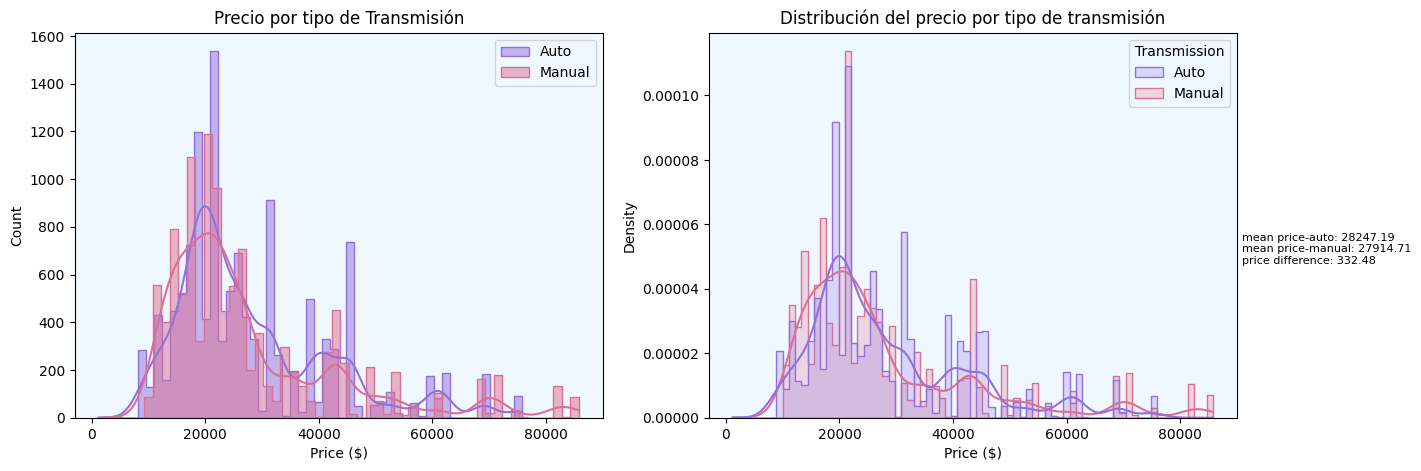

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

sns.histplot(df[df['Transmission'] == 'Auto']["Price ($)"], color='mediumpurple',kde=True, common_norm=False, element='step', label='Auto' )
sns.histplot(df[df['Transmission'] == 'Manual']["Price ($)"], color='palevioletred',kde=True, common_norm=False, element='step', label='Manual')
plt.title('Precio por tipo de Transmisión')
plt.legend()

plt.subplot(1, 2, 2)

mean_price_transa = df[df['Transmission'] == 'Auto']["Price ($)"].mean()
mean_price_transm= df[df['Transmission'] == 'Manual']["Price ($)"].mean()

diff = mean_price_transa-mean_price_transm

sns.histplot(df, x='Price ($)', hue='Transmission', element='step', stat='density', common_norm=False, kde=True, palette={'Auto':'mediumpurple', 'Manual':'palevioletred'})
plt.annotate(f'mean price-auto: {mean_price_transa:.2f}\nmean price-manual: {mean_price_transm:.2f}\nprice difference: {diff:.2f}', xy=(1.01,0.4), xycoords='axes fraction', fontsize=8, color='black')
plt.title('Distribución del precio por tipo de transmisión')


En el gráfico 'Precio por tipo de trasmisión' se observa que la distribución de precios de los automóviles con transmisión automática que fueron adquiridos por los clientes, tiende a concentrarse en el rango de precios alrededor de los $21,000. Por otro lado, la distribución de precios de los automóviles con transmisión manual muestra una mayor dispersión, con un pico en un rango de precios ligeramente más bajo, alrededor de los $20,000.
Se observa que se vendió algunos automóviles con transmisión manual que tienen precios más altos en comparación con los automoviles con transmisión automatica.

En el gráfico de 'Distribución del precio por tipo de transmisión' se observa que al comparar las distribuciones de precios de los automóviles con transmisión automática y manual que se vendieron, no se nota grandes diferencias en la ubicación de los picos y la dispersión de los datos.
La distribución de precios de los automóviles con transmisión automática muestra un sesgo hacia precios más altos, con un pico muy pronunciado.
Asimísmo, la distribución de precios de los automóviles con transmisión manual muestra un pico levemente más pronunciado en un rango de precios similar al rango de precios de automóviles con transmisión automática.

H0= no existen diferencias significativas entre la transmisión de los automoviles y el precio.

Valor de significancia=0.

se realiza un análisis para saber si los datos tienen una distribución normal, para ello primero hacemos la prueba de Shapiro-Wilk.

In [ ]:
grupo3 = df[df['Transmission'] == 'Auto']['Price ($)']
grupo4 = df[df['Transmission'] == 'Manual']['Price ($)']

stat_grupo3, p_valor_grupo3=shapiro(grupo3)
print(f'El grupo3 - estadistico w: {stat_grupo3}, valor p: {p_valor_grupo3}')

stat_grupo4, p_valor_grupo4=shapiro(grupo4)
print(f'El grupo4 - estadistico w: {stat_grupo4}, valor p: {p_valor_grupo4}')

El grupo3 - estadistico w: 0.894124062274513, valor p: 3.6189929191470704e-68
El grupo4 - estadistico w: 0.8195019237259688, valor p: 3.604135572208521e-77


c:\INTRODUCCION_PYTHON\miproj\my_venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12570.
  res = hypotest_fun_out(*samples, **kwds)
c:\INTRODUCCION_PYTHON\miproj\my_venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11335.
  res = hypotest_fun_out(*samples, **kwds)


El valor p es menor que 0.05, por lo tanto rechazamos la H0 de que los datos tienen una distribucion normal. Ya que los datos no vienen de una distribucion normal.

Para la prueba de hipótesis, se utilizará la Prueba de chi-cuadrado

Crear una tabla de contingencia

In [ ]:
tabla_contingencia2 = pd.crosstab(df['Transmission'], df['Price ($)'])

Prueba de hipotes chi-cuadrado

In [ ]:
chi2, p_val, grados_libertad, _ = chi2_contingency(tabla_contingencia2)
print(f"Estadístico chi2: {chi2}, Valor p: {p_val}, Grados de libertad: {grados_libertad}")

Estadístico chi2: 6825.770602843451, Valor p: 0.0, Grados de libertad: 869


El p-valor es menor que 0.05, por lo tanto podemos concluir que hay una asociación significativa entre la transmisión y el precio

Text(0.5, 1.0, 'Distribución del precio segun ingeniria')

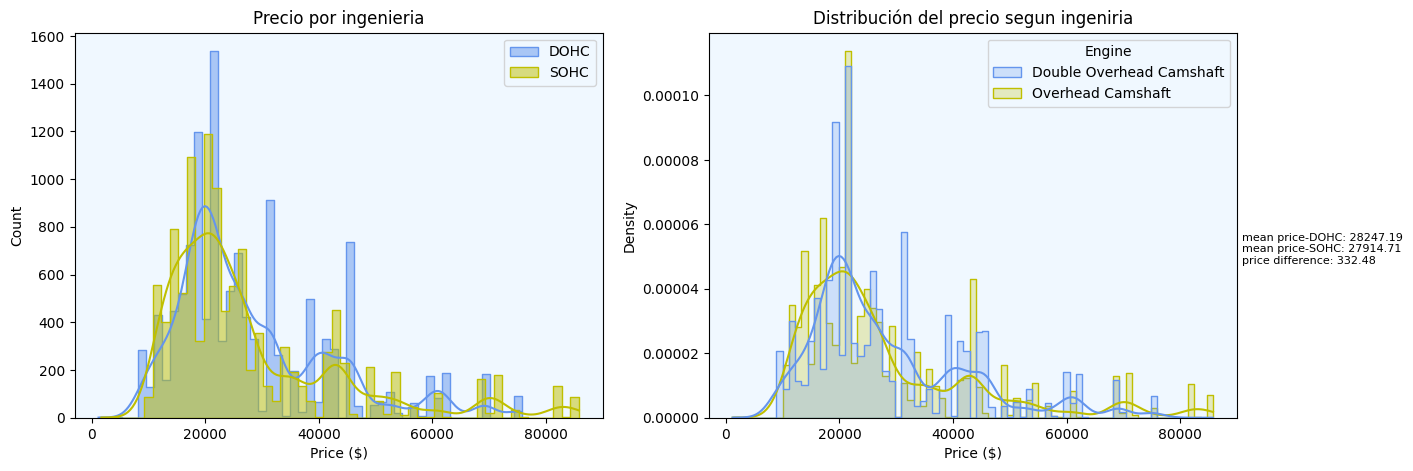

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

sns.histplot(df[df['Engine'] == 'Double Overhead Camshaft']["Price ($)"], color='cornflowerblue',kde=True, common_norm=False, element='step', label='DOHC' )
sns.histplot(df[df['Engine'] == 'Overhead Camshaft']["Price ($)"], color='y',kde=True, common_norm=False, element='step', label='SOHC')
plt.title('Precio por ingenieria')
plt.legend()

plt.subplot(1, 2, 2)

mean_price_ingdohc = df[df['Engine'] == 'Double Overhead Camshaft']["Price ($)"].mean()
mean_price_ingsohc = df[df['Engine'] == 'Overhead Camshaft']["Price ($)"].mean()

diff = mean_price_ingdohc-mean_price_ingsohc

sns.histplot(df, x='Price ($)', hue='Engine', element='step', stat='density', common_norm=False, kde=True, palette={'Double Overhead Camshaft':'cornflowerblue', 'Overhead Camshaft':'y'})

plt.annotate(f'mean price-DOHC: {mean_price_ingdohc:.2f}\nmean price-SOHC: {mean_price_ingsohc:.2f}\nprice difference: {diff:.2f}', xy=(1.01,0.4), xycoords='axes fraction', fontsize=8, color='black')

plt.title('Distribución del precio segun ingeniria')


En el gráfico 'Precio por ingeniería' se observa que la distribución de precios de los automóviles con Ingenieria DOHC que fueron adquiridos por los clientes, tiende a concentrarse en el rango de precios alrededor de los $22,000. Por otro lado, la distribución de precios de los automóviles con Ingenieria SOHC,muestra una mayor dispersión, con un pico en un rango de precios ligeramente más bajo, alrededor de los $20,000.
Se observa que se vendió algunos automóviles con Ingenieria SOHC que tienen precios más altos en comparación con los automoviles con Ingenieria DOHC.

En el gráfico ' Distribución del precio según ingeniería' se observa que al comparar las distribuciones de precios de los automóviles con Ingenieria DOHC y SOHC que se vendieron, no se nota grandes diferencias en la ubicación de los picos y la dispersión de los datos.
La distribución de precios de los automóviles con ingenieria SOHC muestra un sesgo hacia precios más altos, pero con un pico menos pronunciado.
Asimísmo, la distribución de precios de los automóviles con Ingenieria DOHC muestra un pico levemente más pronunciado en un rango de precios similar al rango de precios de automóviles con Ingenieria SOHC.

H0= no existen diferencias significativas entre la ingenieria de los automoviles y el precio.

Valor de significancia=0.

se realiza un análisis para saber si los datos tienen una distribución normal, para ello primero hacemos la prueba de Shapiro-Wilk.

In [ ]:
grupo5 = df[df['Engine'] == 'Double Overhead Camshaft']['Price ($)']
grupo6 = df[df['Engine'] == 'Overhead Camshaft']['Price ($)']

stat_grupo5, p_valor_grupo5=shapiro(grupo5)
print(f'El grupo5 - estadistico w: {stat_grupo5}, valor p: {p_valor_grupo5}')

stat_grupo6, p_valor_grupo6=shapiro(grupo6)
print(f'El grupo6 - estadistico w: {stat_grupo6}, valor p: {p_valor_grupo6}')

El grupo5 - estadistico w: 0.894124062274513, valor p: 3.6189929191470704e-68
El grupo6 - estadistico w: 0.8195019237259688, valor p: 3.604135572208521e-77


c:\INTRODUCCION_PYTHON\miproj\my_venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12570.
  res = hypotest_fun_out(*samples, **kwds)
c:\INTRODUCCION_PYTHON\miproj\my_venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11335.
  res = hypotest_fun_out(*samples, **kwds)


El valor p es menor que 0.05, por lo tanto rechazamos la H0 de que los datos tienen una distribucion normal. Ya que los datos no vienen de una distribucion normal.

Para la prueba de hipótesis, se utilizará la Prueba de chi-cuadrado

Crear una tabla de contingencia

In [ ]:
tabla_contingencia3 = pd.crosstab(df['Engine'], df['Price ($)'])

Prueba de hipotes chi-cuadrado

In [ ]:
chi2, p_val, grados_libertad, _ = chi2_contingency(tabla_contingencia3)
print(f"Estadístico chi2: {chi2}, Valor p: {p_val}, Grados de libertad: {grados_libertad}")

Estadístico chi2: 6825.770602843451, Valor p: 0.0, Grados de libertad: 869


El p-valor es menor que 0.05, por lo tanto podemos concluir que hay una asociación significativa entre la Ingenieria y el precio.

Text(0.5, 1.0, 'Distribución del precio segun Región')

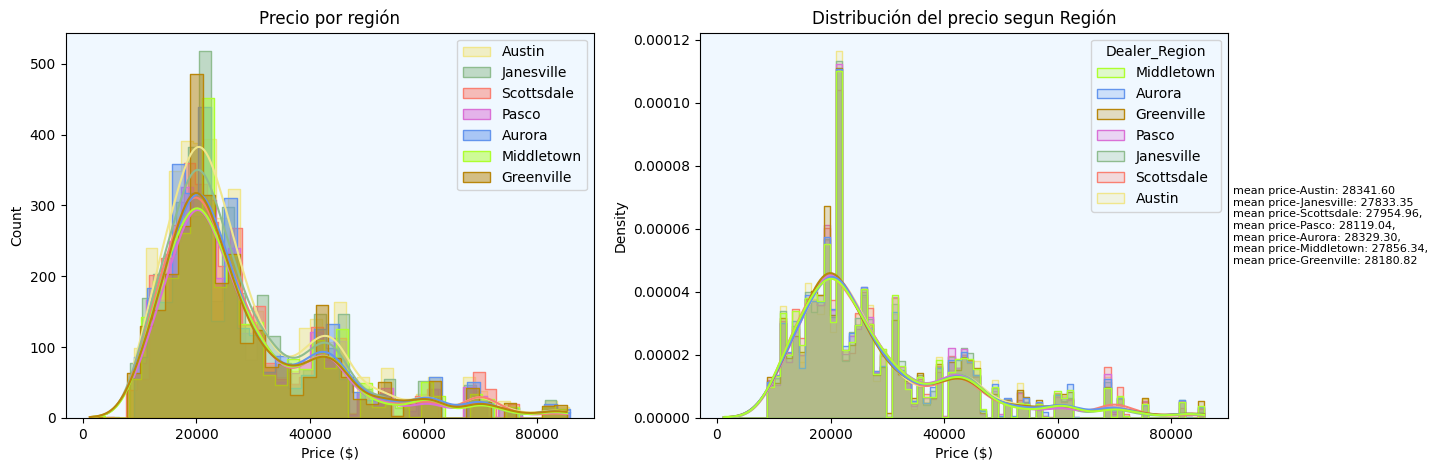

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

sns.histplot(df[df['Dealer_Region'] == 'Austin']["Price ($)"], color='khaki',kde=True, common_norm=False, element='step', label='Austin' )
sns.histplot(df[df['Dealer_Region'] == 'Janesville']["Price ($)"], color='darkseagreen',kde=True, common_norm=False, element='step', label='Janesville')
sns.histplot(df[df['Dealer_Region'] == 'Scottsdale']["Price ($)"], color='salmon',kde=True, common_norm=False, element='step', label='Scottsdale')
sns.histplot(df[df['Dealer_Region'] == 'Pasco']["Price ($)"], color='orchid',kde=True, common_norm=False, element='step', label='Pasco')
sns.histplot(df[df['Dealer_Region'] == 'Aurora']["Price ($)"], color='cornflowerblue',kde=True, common_norm=False, element='step', label='Aurora')
sns.histplot(df[df['Dealer_Region'] == 'Middletown']["Price ($)"], color='greenyellow',kde=True, common_norm=False, element='step', label='Middletown')
sns.histplot(df[df['Dealer_Region'] == 'Greenville']["Price ($)"], color='darkgoldenrod',kde=True, common_norm=False, element='step', label='Greenville')

plt.title('Precio por región')
plt.legend()

plt.subplot(1, 2, 2)

mean_price_da = df[df['Dealer_Region'] == 'Austin']["Price ($)"].mean()
mean_price_dj = df[df['Dealer_Region'] == 'Janesville']["Price ($)"].mean()
mean_price_ds = df[df['Dealer_Region'] == 'Scottsdale']["Price ($)"].mean()
mean_price_dp = df[df['Dealer_Region'] == 'Pasco']["Price ($)"].mean()
mean_price_dau = df[df['Dealer_Region'] == 'Aurora']["Price ($)"].mean()
mean_price_dm = df[df['Dealer_Region'] == 'Middletown']["Price ($)"].mean()
mean_price_dg = df[df['Dealer_Region'] == 'Greenville']["Price ($)"].mean()


sns.histplot(df, x='Price ($)', hue='Dealer_Region', element='step', stat='density', common_norm=False, kde=True, palette={'Austin': 'khaki', 'Janesville': 'darkseagreen','Scottsdale':'salmon', 'Pasco':'orchid', 'Aurora':'cornflowerblue', 'Middletown':'greenyellow', 'Greenville':'darkgoldenrod'})
plt.annotate(f'mean price-Austin: {mean_price_da:.2f}\nmean price-Janesville: {mean_price_dj:.2f}\nmean price-Scottsdale: {mean_price_ds:.2f},\nmean price-Pasco: {mean_price_dp:.2f},\nmean price-Aurora: {mean_price_dau:.2f},\nmean price-Middletown: {mean_price_dm:.2f},\nmean price-Greenville: {mean_price_dg:.2f}', xy=(1.01,0.4), xycoords='axes fraction', fontsize=8, color='black')
plt.title('Distribución del precio segun Región')

En el grafico 'Precio por región' se observa que los  precios de los automóviles  tienden a concentrarse alrededor de los $20,000, siendo la región Janerville con el pico más alto, con una frecuencia por encima de los 500.

En el gráfico 'Distribución del precio según región' se observa que al comparar las distribuciones de precios de los automóviles por región, no se nota grandes diferencias en la ubicación de los picos y la dispersión de los datos. por lo tanto, podemos decir que las distribuciones de los precios segun region tienen un comportamiento similar.

H0= no existen diferencias significativas entre las regiones del distribuidor y los precios de los automoviles.

Valor de significancia=0.05

se realiza un análisis para saber si los datos tienen una distribución normal, para ello primero hacemos la prueba de Shapiro-Wilk.

Prueba de Hipotes Kruskal ()

In [ ]:
from scipy import stats
grupo7 = df[df['Dealer_Region'] == 'Austin']['Price ($)']
grupo8 = df[df['Dealer_Region'] == 'Janesville']['Price ($)']
grupo9 = df[df['Dealer_Region'] == 'Scottsdale']['Price ($)']
grupo10 = df[df['Dealer_Region'] == 'Pasco']['Price ($)']
grupo11 = df[df['Dealer_Region'] == 'Aurora']['Price ($)']
grupo12 = df[df['Dealer_Region'] == 'Middletown']['Price ($)']
grupo13 = df[df['Dealer_Region'] == 'Greenville']['Price ($)']

h_stat, p_val=stats.kruskal(grupo7, grupo8, grupo9, grupo10,  grupo11, grupo12,  grupo13)
print(f"Estadístico H: {h_stat},Valor p: {p_val}")

Estadístico H: 3.998855570332702,Valor p: 0.676831297892005


El p-valor es mayor que 0.05, por lo tanto podemos concluir que no hay una asociación significativa entre la región y el precio.

Dado que el p-valor es bastante grande, no hay suficiente evidencia para rechazar la hipótesis nula de que no hay asociación entre las variables región y precio. En otras palabras, no se ha encontrado una asociación significativa entre las variables en el análisis realizado.

https://www.kaggle.com/code/ddosad/tourism-website-engagement-eda/notebook
https://www.kaggle.com/code/ddosad/tourism-website-engagement-eda/notebook

In [ ]:
df.head()

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df['Date']=df['Date'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23905 non-null  object
 1   Date           23905 non-null  object
 2   Customer_Name  23905 non-null  object
 3   Gender         23905 non-null  object
 4   Annual_Income  23905 non-null  int64 
 5   Dealer_Name    23905 non-null  object
 6   Company        23905 non-null  object
 7   Model          23905 non-null  object
 8   Engine         23905 non-null  object
 9   Transmission   23905 non-null  object
 10  Color          23905 non-null  object
 11  Price ($)      23905 non-null  int64 
 12  Dealer_No      23905 non-null  object
 13  Body Style     23905 non-null  object
 14  Phone          23905 non-null  int64 
 15  Dealer_Region  23905 non-null  object
dtypes: int64(3), object(13)
memory usage: 3.1+ MB


Extraer de 'Date' el año, mes y dia

In [ ]:
df[['year', 'month', 'day']] = df['Date'].str.split('-', n=2, expand=True)
df.head()

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,year,month,day
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,2022,01,02
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,2022,01,02
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,2022,01,02
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,2022,01,02
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,2022,01,02


Podemos decir que las siguientes variables no aportan informacion para el modelamieto: Car_id, Date, Customer_Name, Dealer_No, Phone, day; por lo que eliminaremos estas caracteristicas.

In [ ]:
df=df.drop(columns=['Car_id', 'Customer_Name', 'Dealer_No ', 'Phone'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23905 non-null  object
 1   Gender         23905 non-null  object
 2   Annual_Income  23905 non-null  int64 
 3   Dealer_Name    23905 non-null  object
 4   Company        23905 non-null  object
 5   Model          23905 non-null  object
 6   Engine         23905 non-null  object
 7   Transmission   23905 non-null  object
 8   Color          23905 non-null  object
 9   Price ($)      23905 non-null  int64 
 10  Body Style     23905 non-null  object
 11  Dealer_Region  23905 non-null  object
 12  year           23905 non-null  object
 13  month          23905 non-null  object
 14  day            23905 non-null  object
dtypes: int64(2), object(13)
memory usage: 2.9+ MB


In [ ]:
df['year']=df['year'].astype(int)
#df['month']=df['month'].astype(int)
#df['day']=df['day'].astype(int)

In [ ]:
df['Transmission'].unique()

array(['Auto', 'Manual'], dtype=object)

In [ ]:
name=df.columns
name

Index(['Date', 'Gender', 'Annual_Income', 'Dealer_Name', 'Company', 'Model',
       'Engine', 'Transmission', 'Color', 'Price ($)', 'Body Style',
       'Dealer_Region', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
from scipy import stats

In [ ]:
Q1 = df['Annual_Income'].quantile(0.25)
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

Q1_2 = df['Price ($)'].quantile(0.25)
Q3_2 = df['Price ($)'].quantile(0.75)
IQR2 = Q3_2 - Q1_2
lower_bound = Q3_2 + 1.5 * IQR2

In [ ]:
df['Annual_Income'] = np.where(df['Annual_Income'] > upper_bound, upper_bound, df['Annual_Income'])
df['Annual_Income'] = np.where(df['Annual_Income'] < upper_bound, upper_bound, df['Annual_Income'])
#df['Price ($)'] = np.where(df['Price ($)'] < lower_bound, lower_bound, df['Price ($)'])
#df['Price ($)'] = np.where(df['Price ($)'] > lower_bound, lower_bound, df['Price ($)'])

In [ ]:
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           23905 non-null  datetime64[ns]
 1   Gender         23905 non-null  object        
 2   Annual_Income  23905 non-null  float64       
 3   Dealer_Name    23905 non-null  object        
 4   Company        23905 non-null  object        
 5   Model          23905 non-null  object        
 6   Engine         23905 non-null  object        
 7   Transmission   23905 non-null  object        
 8   Color          23905 non-null  object        
 9   Price ($)      23905 non-null  int64         
 10  Body Style     23905 non-null  object        
 11  Dealer_Region  23905 non-null  object        
 12  year           23905 non-null  int32         
 13  month          23905 non-null  object        
 14  day            23905 non-null  object        
dtypes: datetime64[ns](1), fl

In [ ]:
df=df[['Date','Price ($)']]

In [ ]:
df.set_index('Date', inplace=True)
df.tail(5)

,Price ($)
Date,
2023-12-31,12000
2023-12-31,16000
2023-12-31,21000
2023-12-31,31000
2023-12-31,27500


In [ ]:
df.head(5)

,Price ($)
Date,
2022-01-02,26000
2022-01-02,19000
2022-01-02,31500
2022-01-02,14000
2022-01-02,24500


In [ ]:
df_total=df.groupby('Date')[['Price ($)']].sum()
df_total

,Price ($)
Date,
2022-01-02,882250
2022-01-03,575503
2022-01-04,393700
2022-01-05,938103
2022-01-06,303202
...,...
2023-12-26,1870597
2023-12-27,962103
2023-12-29,4430666


#PREPROCESAMIENTO

Para el modelamiento de datos utilizaremos la red neuronal recurrente LSTM, que nos permitirá predecir la venta de las compañías automotrices a lo largo del tiempo.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [ ]:
import sklearn

In [ ]:
import numpy as np
#import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, LSTM

from sklearn import set_config
set_config(display='diagram')


In [ ]:
train=np.array(df_total.loc['2022-01-02':'2023-09-30', ['Price ($)']])
test=np.array(df_total.loc['2023-09-01':'2023-12-31', ['Price ($)']])

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
train = scaler.fit_transform(train.reshape(-1, 1))
test = scaler.transform(test.reshape(-1, 1))

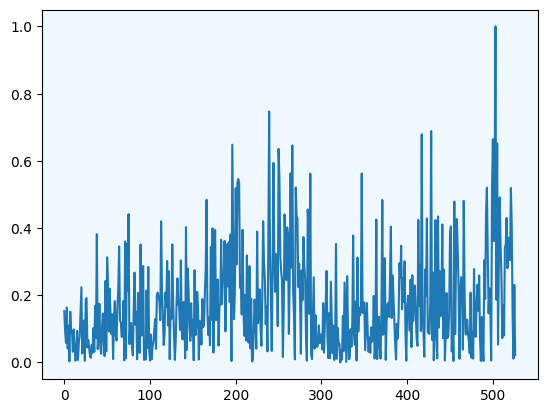

In [ ]:
plt.plot(train)

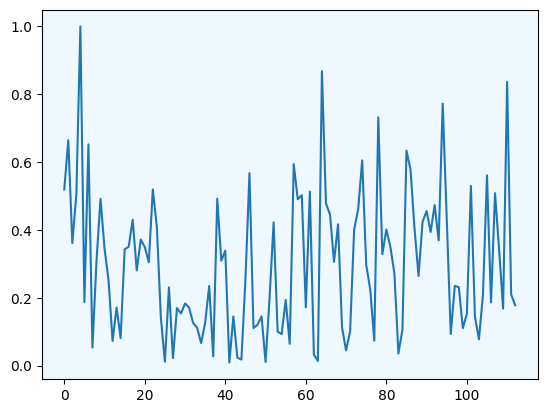

In [ ]:
plt.plot(test)

In [ ]:
prev_months = 1
generator = timeseries_dataset_from_array(
    train, # columna de características de entrada
    train, # columna objetivo
    sequence_length=prev_months)

In [ ]:
model = Sequential()

In [ ]:
model = Sequential()
model.add(LSTM(units = 200,
               return_sequences = True))
model.add(LSTM(units = 200,
               return_sequences = True))
model.add(LSTM(units = 200,
               return_sequences = False))
# Output layer
model.add(Dense(units = 1, activation = 'linear'))

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
history = model.fit(generator,
                    epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0445
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0330 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0205
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0145
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0208
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0170 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0118
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0090
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6376e-04
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2015e-04 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2292e-04
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1754e-04 
Epo

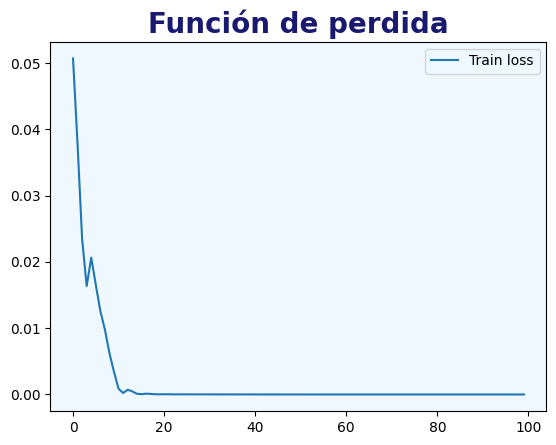

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.title('Función de perdida', fontsize=20, color='midnightblue', fontweight='bold')
plt.legend()

Se obtuvo un resultado de la función de pérdida de 1.3440e-07, por lo que podemos decir que el modelo se ajusta bien a los datos de entrenamiento.

In [ ]:
# testing
full = np.concatenate((train, test))
test_days = pd.DataFrame(full)[len(full) - len(test) - prev_months:].values
generator_test = timeseries_dataset_from_array(
    test_days,
    test_days,
    sequence_length=prev_months)

# Predicciones
preds = model.predict(generator_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


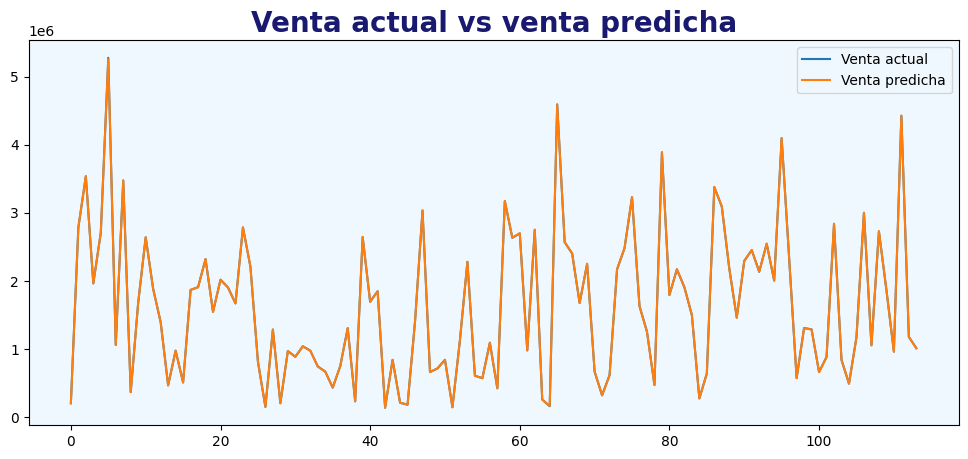

In [ ]:
plt.figure(figsize = (12, 5))
plt.plot(scaler.inverse_transform(test_days), label='Venta actual')
plt.plot(scaler.inverse_transform(preds), label='Venta predicha')
plt.title('Venta actual vs venta predicha', fontsize=20, color='midnightblue', fontweight='bold')
plt.legend()

En el gráfico podemos observar que el modelo está capturando bien la tendencia de los datos.

In [ ]:
r2_score(test_days, preds)

0.9999920395642584

In [ ]:
mean_squared_error(test_days, preds)

3.548444772189661e-07

In [ ]:
mean_absolute_error(test_days, preds)

0.0003847410575641369

In [ ]:
aux=scaler.inverse_transform(test_days)
aux.flatten()

array([ 201703., 2784644., 3538293., 1964216., 2708920., 5280696.,
       1059808., 3475783.,  365505., 1683970., 2641121., 1882647.,
       1396118.,  465105.,  976506.,  508057., 1868704., 1908640.,
       2321620., 1546316., 2017912., 1904565., 1670450., 2785542.,
       2208765.,  816000.,  148500., 1286856.,  201703.,  970303.,
        886014., 1040511.,  976212.,  743706.,  668157.,  432702.,
        747897., 1306764.,  230103., 2645607., 1694020., 1849161.,
        136101.,  841111.,  209602.,  180701., 1406319., 3035618.,
        661957.,  714704.,  841514.,  143101., 1129613., 2280842.,
        607504.,  570703., 1093209.,  422507., 3173356., 2634487.,
       2698890.,  979608., 2751175.,  256705.,  159103., 4596334.,
       2569907., 2403071., 1676225., 2251629.,  668208.,  319401.,
        615904., 2169963., 2481725., 3230167., 1630023., 1254948.,
        469904., 3890673., 1793767., 2171430., 1908252., 1499863.,
        272503.,  640660., 3379233., 3092320., 2183815., 14612

In [ ]:
df_res=pd.DataFrame()
df_res["Real"]=scaler.inverse_transform(test_days).flatten()
df_res["Predicted"]=scaler.inverse_transform(preds)
df_res["Diff"]= df_res["Real"]- df_res["Predicted"]
df_res

,Real,Predicted,Diff
0,201703.0,2.038765e+05,-2173.515625
1,2784644.0,2.788166e+06,-3522.500000
2,3538293.0,3.542087e+06,-3794.000000
3,1964216.0,1.964481e+06,-264.750000
4,2708920.0,2.712212e+06,-3291.500000
...,...,...,...
109,1870597.0,1.870476e+06,120.750000
110,962103.0,9.602151e+05,1887.875000
111,4430666.0,4.426826e+06,3840.000000
112,1178503.0,1.176563e+06,1939.750000


In [ ]:
r2_score(df_res['Real'],df_res['Predicted'])

0.9999920394752644

In [ ]:
mean_absolute_error(df_res['Real'],df_res['Predicted'])

1997.465323464913

In [ ]:
mean_squared_error(df_res['Real'],df_res['Predicted'])

9564477.436752632

#CONCLUSIONES Y RECOMENDACIONES

##Conclusiones


•	El análisis de datos nos muestra que el 79% de los clientes son hombres y el 21% son mujeres. Asimismo, el estilo de cuerpo más vendido es el SUV y Hatchback con un 27% y 26% respectivamente. El color más vendido es el Palet White con un 47%.


•	Se realizó el análisis de venta de 30 compañías; de las cuales 15 de ellas representan el 72% de las ventas totales siendo estas, Chevrolet Dodge, Ford Volkswagen, Mercedes B, Mitsubishi, Chrysler, Oldsmobile, Toyota, Nissan, Mercury, Lexus, Pontiac, BMW y Volvo.


•	Se realizo el análisis de venta de 7 ciudades de Estados Unidos, de las cuales Austin, Janesville y Scottsdale representan el 47% del total de ventas.


•	Se realizo un análisis de la distribución de los ingresos anuales de hombres y mujeres, asimismo el precio de los autos que adquirieron, teniendo como resultado que los hombres tienen un mayor nivel de ingresos, pero en la adquisición de autos, las mujeres adquieres autos con precios similares al de los que adquieren los hombres.


•	La distribución de los precios en las diferentes regiones tiene un comportamiento similar, sim embargo en las ciudades de Middlenton, Grrendville, Scottsdale se vendieron autos con los precios más bajos en la región.


•	La tendencia anual nos indica que el año 2023 las ventas fueron mayores en comparación del año 2022, y los meses de mayor demanda fueron septiembre, noviembre y diciembre, esto posiblemente se deba a la celebración de ¡festividades como la navidad, y los meses de menor venta fueron enero y febrero, posiblemente esto se deba a los gastos realizados en los meses anteriores.


•	Para la predicción de las ventas utilizamos el modelo de Red Neuronal Recurrente LSTM, ya que es un modelo que puede aprender dependencias a largo plazo en las secuencias de datos, ayuda a mitigar los problemas del desvanecimiento y explosión de gradiente lo que hace que el entrenamiento sea más estable y efectivo.


•	Este trabajo concluye con un resultado del modelamiento de datos R^2 del 99.9992% lo que indica que el modelo a predicho eficientemente la tendencia de los datos nuevos, asimismo, un resultado de MAE de 1,998, lo que indica el promedio de la distancia entre el resultado real y la predicción, podemos decir que el resultado es óptimo teniendo en cuenta que las ventas están representadas en millones de dólares.


##Recomendaciones


•	Los interesados de la industria automotriz pueden tomar en cuenta los resultados obtenidos para dirigir sus campañas de marketing de acuerdo al género y las preferencias de sus clientes. Asimismo, se le sugiere reducir sus inventarios en el mes de enero y febrero, y aumentar este para el mes de septiembre, noviembre y diciembre.
